# Modelos probabilísticos 



Los modelos probabilísticos actúan como puente entre lo observado (muestra) y lo desconocido (población) y el cáculo de probabilidades con dichos modelos cuantificará la incertidumbre de afirmar propiedades de la población a partir de la muestra.

__(Recordemos) Definición de variable aleatoria__: Una variable aleatoria es toda función cuyos valores numéricos, 
por depender del resultado de un fenómeno aleatorio, se producen al azar, tomando diversos valores con distintas 
probabilidades.

Las variables aleatorias se clasifican en:


* __DISCRETAS__: Variables aleatorias que toman valores numéricos aislados y puntuales:

    * Número de clientes que ponen una reclamación en la empresa de 50 elegidos al azar. 
    * Avisos de Whatsapp que recibimos en nuestro móvil cada día.
    * Pacientes que asisten a urgencias en un Centro de Salud al año.
    
* __CONTINUAS__: Variables aleatorias que toman todos los valores posibles en un rango determinado:
    
    * Estatura de un individuo.
    * Nivel de colesterol de un individuo.
    * Salarios en una determinada empresa.


## Variables discretas

### Distribución Bernoulli: $\mathcal{B}(p)$

A los experimentos aleatorios en los que solo se pueden dar dos resultados posibles: éxito y fracaso.

__[Ejemplo]__: Lanzamiento de una moneda trucada: la probabilidad de salir cara (éxito) es 0.8

$$X=\begin{cases}
0 & \mbox{sale cruz}\\
1 & \mbox{sale cara}
\end{cases}
$$

Entonces $X \sim \mathcal{B}(0.8)$

La __función masa de probabilidad__ (_pmf_ en sus siglas en inglés) es 

$$p_1=P(X=x_1)=P(X=0)=1-p, \quad p_2=P(X=x_2)=P(X=1)= p$$

Para el ejemplo anterior, 

|Valor X          |0  |1  |
|-----------------|---|---|
|$p_i$       |0.2|0.8|


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


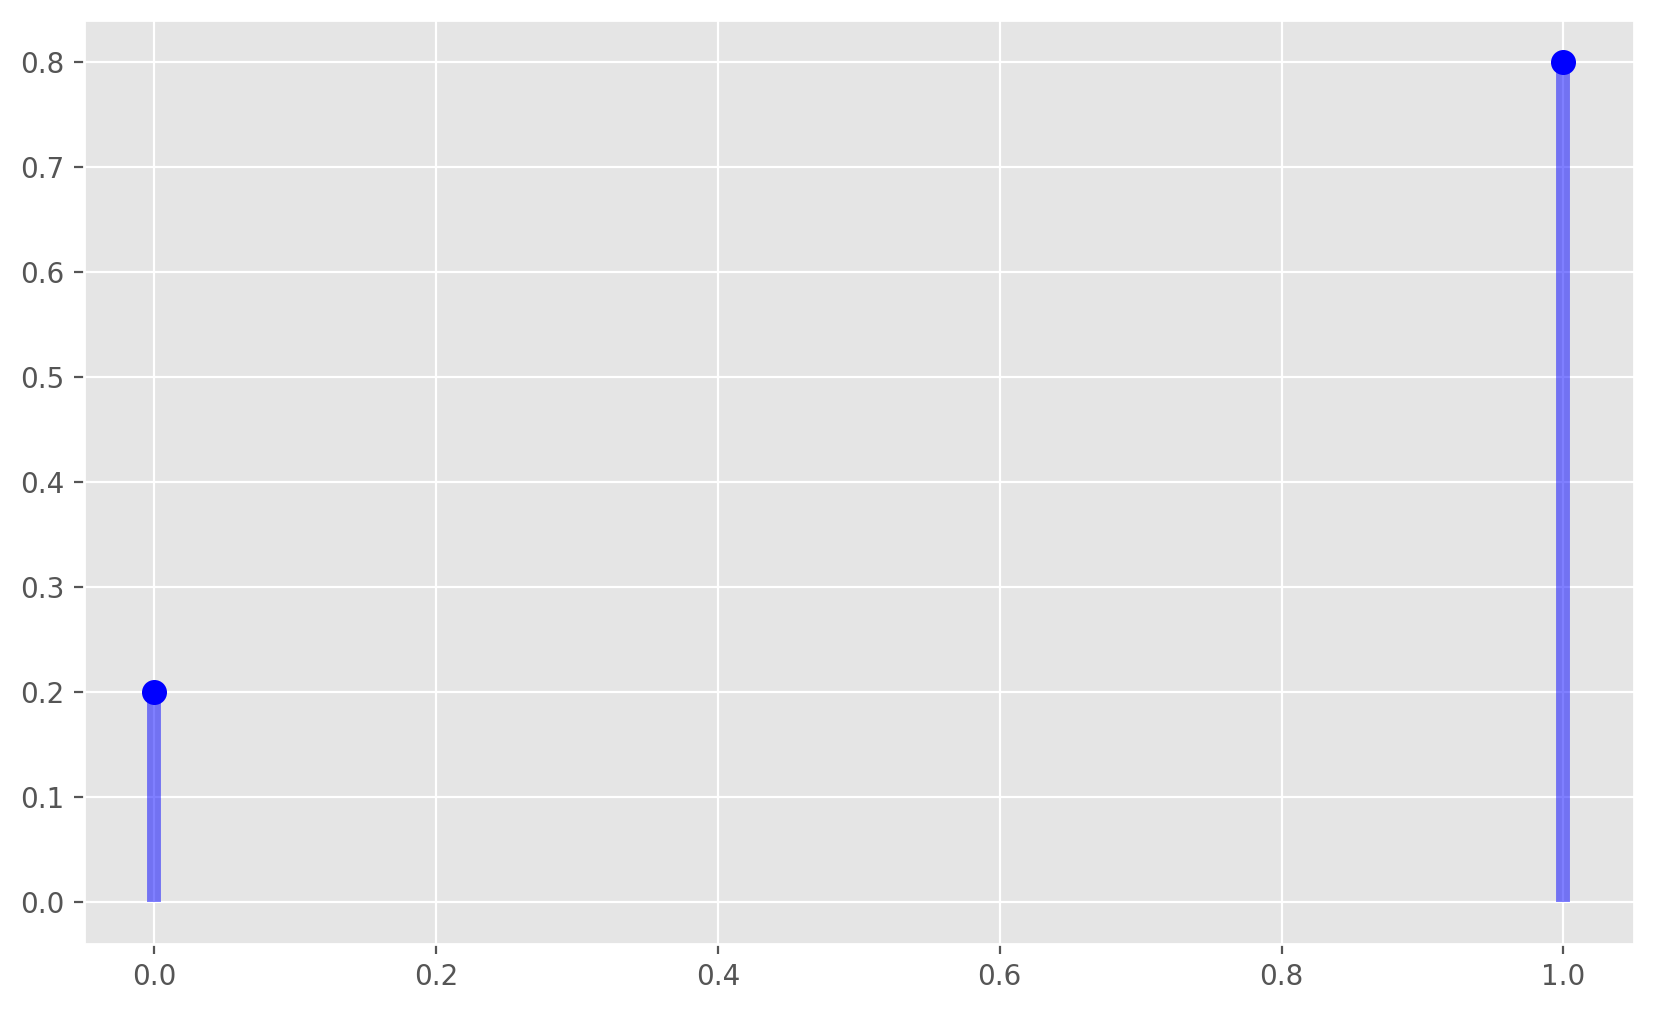

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
pylab.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import scipy.stats as st
import pandas as pd


X = st.bernoulli(0.8)

x = np.array([0.0, 1.0])
y = X.pmf(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', ms=8, label='Bernoulli pmf')
ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.5);

Además alguna de las características de esta distribución son 

In [2]:
p = 0.8

mean, var, skew, kurt = st.bernoulli.stats(p, moments='mvsk')
print('media = ', mean, 'varianza = ', var, 'asimetría = ', skew, 'curtosis = ', kurt)

media =  0.8 varianza =  0.15999999999999998 asimetría =  -1.5000000000000016 curtosis =  0.2500000000000031


### Distribución Binomial: $\mathcal{Bi}(n,p)$

Si un experimento de Bernoulli se realiza consecutivamente $n$ veces, de forma independiente, y siempre en las mismas condiciones que la primera vez, entonces podemos calcualr el __número total de éxitos conseguidos en las $n$ repeticiones/ensayos__.

En ese caso, $X$, el número de éxitos en $n$ intentos, con probabilidad de éxito $p$ sigue una distribución Binomial: $\mathcal{Bi}(n,p)$. La __función masa de probabilidad__ (pmf)

$$P(X=k) = {n \choose k} p^k \cdot (1-p)^{n-k}$$

### Ejemplo 

En un concesionario que atiende con cita previa y crea 10 citas cada día, considerad la variable aleatoria definida como el número de coches vendidos cada día, con una probabilidad de venta del coche de 0.31. Entonces $$X\sim \mathcal{Bi}(10, 0.31)$$


In [25]:
n = 10
p = 0.31
X = st.binom(n, p)

x_i = np.arange(11)
print(x_i)
# probabilidad de cada número de ventas
p_i = X.pmf(x_i)
print(p_i)
# Generamos las muestras
data = pd.DataFrame({'muestras':X.rvs(10000)})
# Y las contabilizamos
a = data.muestras.value_counts(normalize=True)
print(a)
x = a.index.values
y = a.values


[ 0  1  2  3  4  5  6  7  8  9 10]
[2.44619406e-02 1.09901472e-01 2.22192107e-01 2.66201172e-01
 2.09295849e-01 1.12837762e-01 4.22460220e-02 1.08457696e-02
 1.82727640e-03 1.82433393e-04 8.19628287e-06]
3    0.2671
2    0.2211
4    0.2107
5    0.1163
1    0.1085
6    0.0400
0    0.0233
7    0.0102
8    0.0025
9    0.0003
Name: muestras, dtype: float64


<BarContainer object of 10 artists>

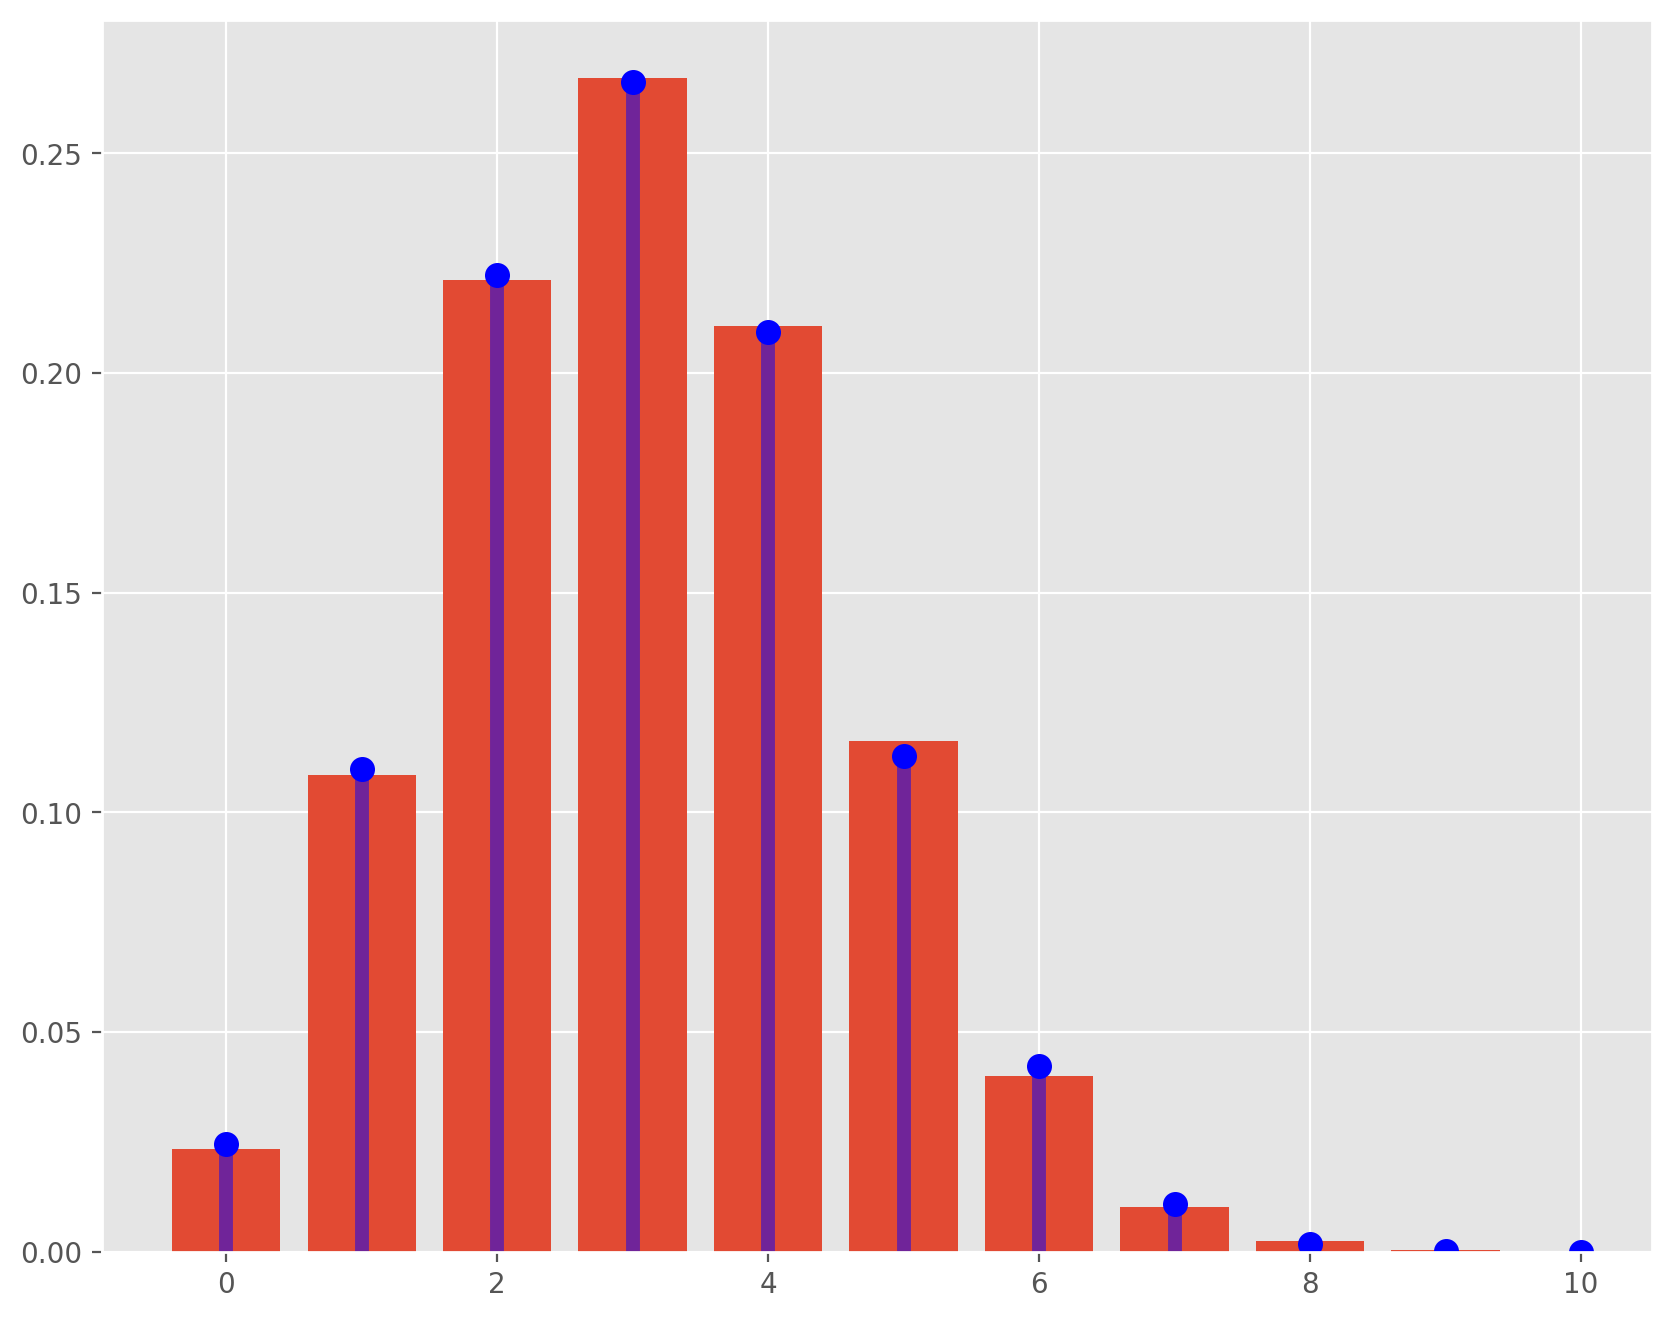

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(x_i, p_i, 'bo', ms=8, label='binom pmf')
ax.vlines(x_i, 0, p_i, colors='b', lw=5, alpha=0.5);
ax.bar(x,y)
#xx = np.arange(100)
#ax[1].plot(xx, X.cdf(xx), 'bo'); # Función de distribución (cdf en sus siglas en inglés)

### __Ejercicio__ 

Calcula la media, varianza, asimetría y curtosis de la distribución $\mathcal{Bi} (10, 0.31)$

In [29]:
#help(st.binom)
momentos = st.binom.stats(10, 0.31, moments='mvsk')
#print(momentos)
nombres = tuple(['media', 'varianza', 'asimetría', 'curtosis'])

for nombres, momentos in zip(nombres, momentos):
    print(f"{nombres} = {momentos}.")


media = 3.1.
varianza = 2.139.
asimetría = 0.2598233657567664.
curtosis = -0.13249181860682557.


### Distribución Poisson: $\mathcal{Po}(\lambda)$

Describen el número de veces que ocurre un suceso __por unidad de tiempo o espacio__:

* Avisos de Whatsapp que recibimos en nuestro móvil cada día.
* Pacientes que asisten a urgencias en un Centro de Salud al año.

La distribución queda definida por el parámetro $\lambda$ que representa el número medio de ocurrencias del suceso. Por ejemplo, Si $X$ representa el número de avisos de Whatsapp que recibimos en nuestro móvil cada día, y modelamos $X$ como

$$ X \sim \mathcal{Po} (54)$$ 

significa que recibimos como media al día 54 avisos al móvil. 

La función masa de probabilidad es 

$$P(X=k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}$$

### Ejemplo.
Representamos la función masa de probabilidad de una distribución $\mathcal{Po} (54)$

In [32]:
#λ = 54
X = st.poisson(54)
x_i = np.arange(30,80)
# print(x_i)

p_i = X.pmf(x_i)

data = pd.DataFrame({'muestras':X.rvs(1000)})

a = data.muestras.value_counts(normalize=True)
print(a)
x = a.index.values
y = a.values


53    0.072
57    0.059
58    0.058
55    0.056
51    0.053
59    0.052
52    0.048
48    0.045
54    0.045
56    0.043
60    0.037
50    0.036
61    0.036
49    0.035
63    0.029
62    0.028
45    0.027
65    0.026
47    0.026
44    0.025
46    0.024
43    0.020
42    0.020
64    0.017
68    0.010
66    0.009
38    0.006
67    0.006
69    0.006
70    0.006
40    0.005
39    0.005
41    0.005
72    0.004
74    0.004
71    0.004
37    0.003
33    0.002
76    0.002
75    0.002
79    0.001
35    0.001
36    0.001
73    0.001
Name: muestras, dtype: float64


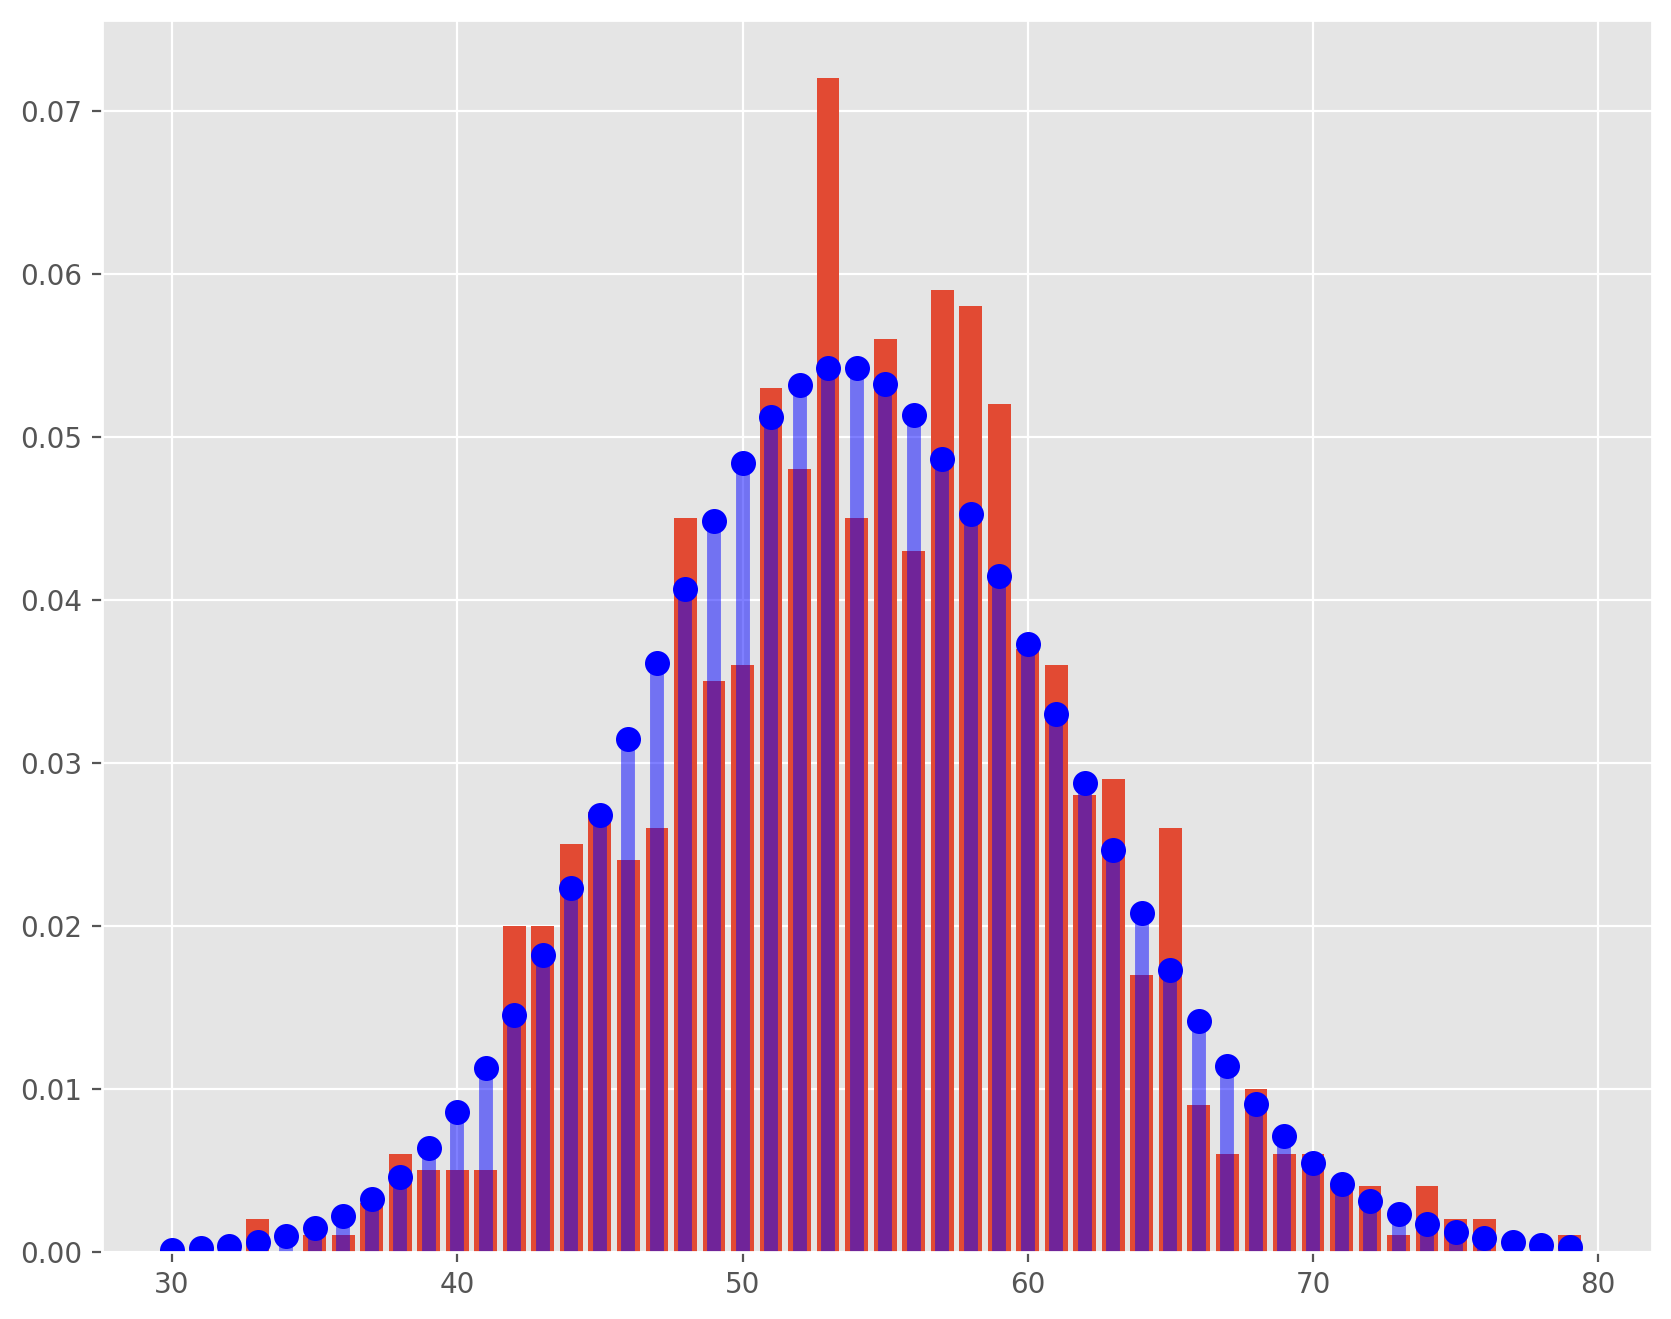

In [33]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(x_i, p_i, 'bo', ms=8, label='binom pmf')
ax.vlines(x_i, 0, p_i, colors='b', lw=5, alpha=0.5)
ax.bar(x,y);

### __Ejercicio__ 

Calcula la media, varianza, asimetría y curtosis de la distribución $ X \sim \mathcal{Po} (54)$

### __Ejercicio__

Demuestra (empíricamente) que si $X_1 \sim \mathcal{Po} (10)$ y $X_2 \sim \mathcal{Po} (5)$, si $X_1$ y $X_2$ son independientes entonces $X_1 + X_2 \sim \mathcal{Po} (15)$

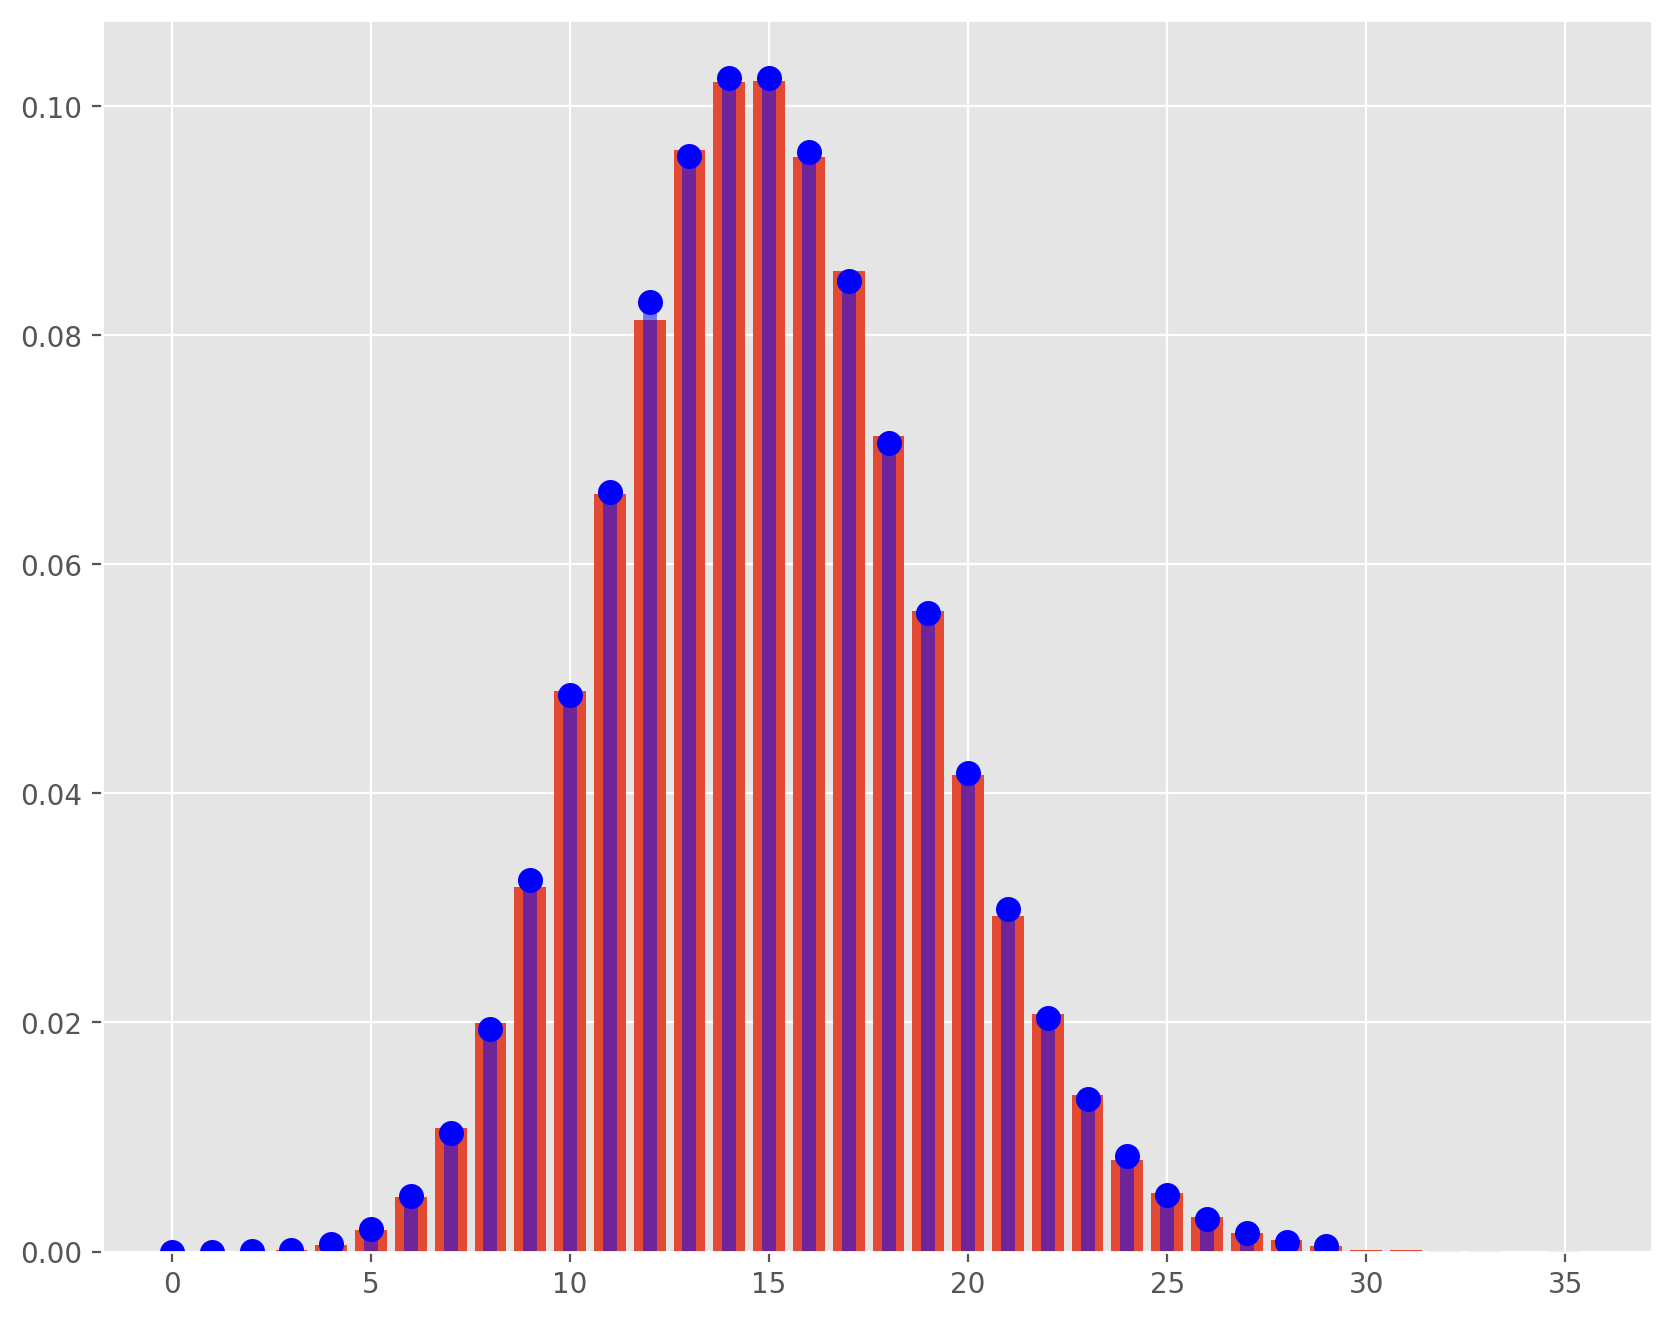

In [8]:
# Función masa de probabilidad de Po(15)
SUMA = st.poisson(15)
x_i = np.arange(0,30)
p_i = SUMA.pmf(x_i)

# Generamos muestras de Po(10) y Po(5), y sumamos
muestras = st.poisson(10).rvs(100000) + st.poisson(5).rvs(100000)
data = pd.DataFrame({'muestras': muestras})
a = data.muestras.value_counts(normalize=True)
x = a.index.values
y = a.values

# Dibujamos
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(x_i, p_i, 'bo', ms=8)
ax.vlines(x_i, 0, p_i, colors='b', lw=5, alpha=0.5)
ax.bar(x,y);

## Variables continuas

#### __Nota:__ explicación de histogramas con densidades.

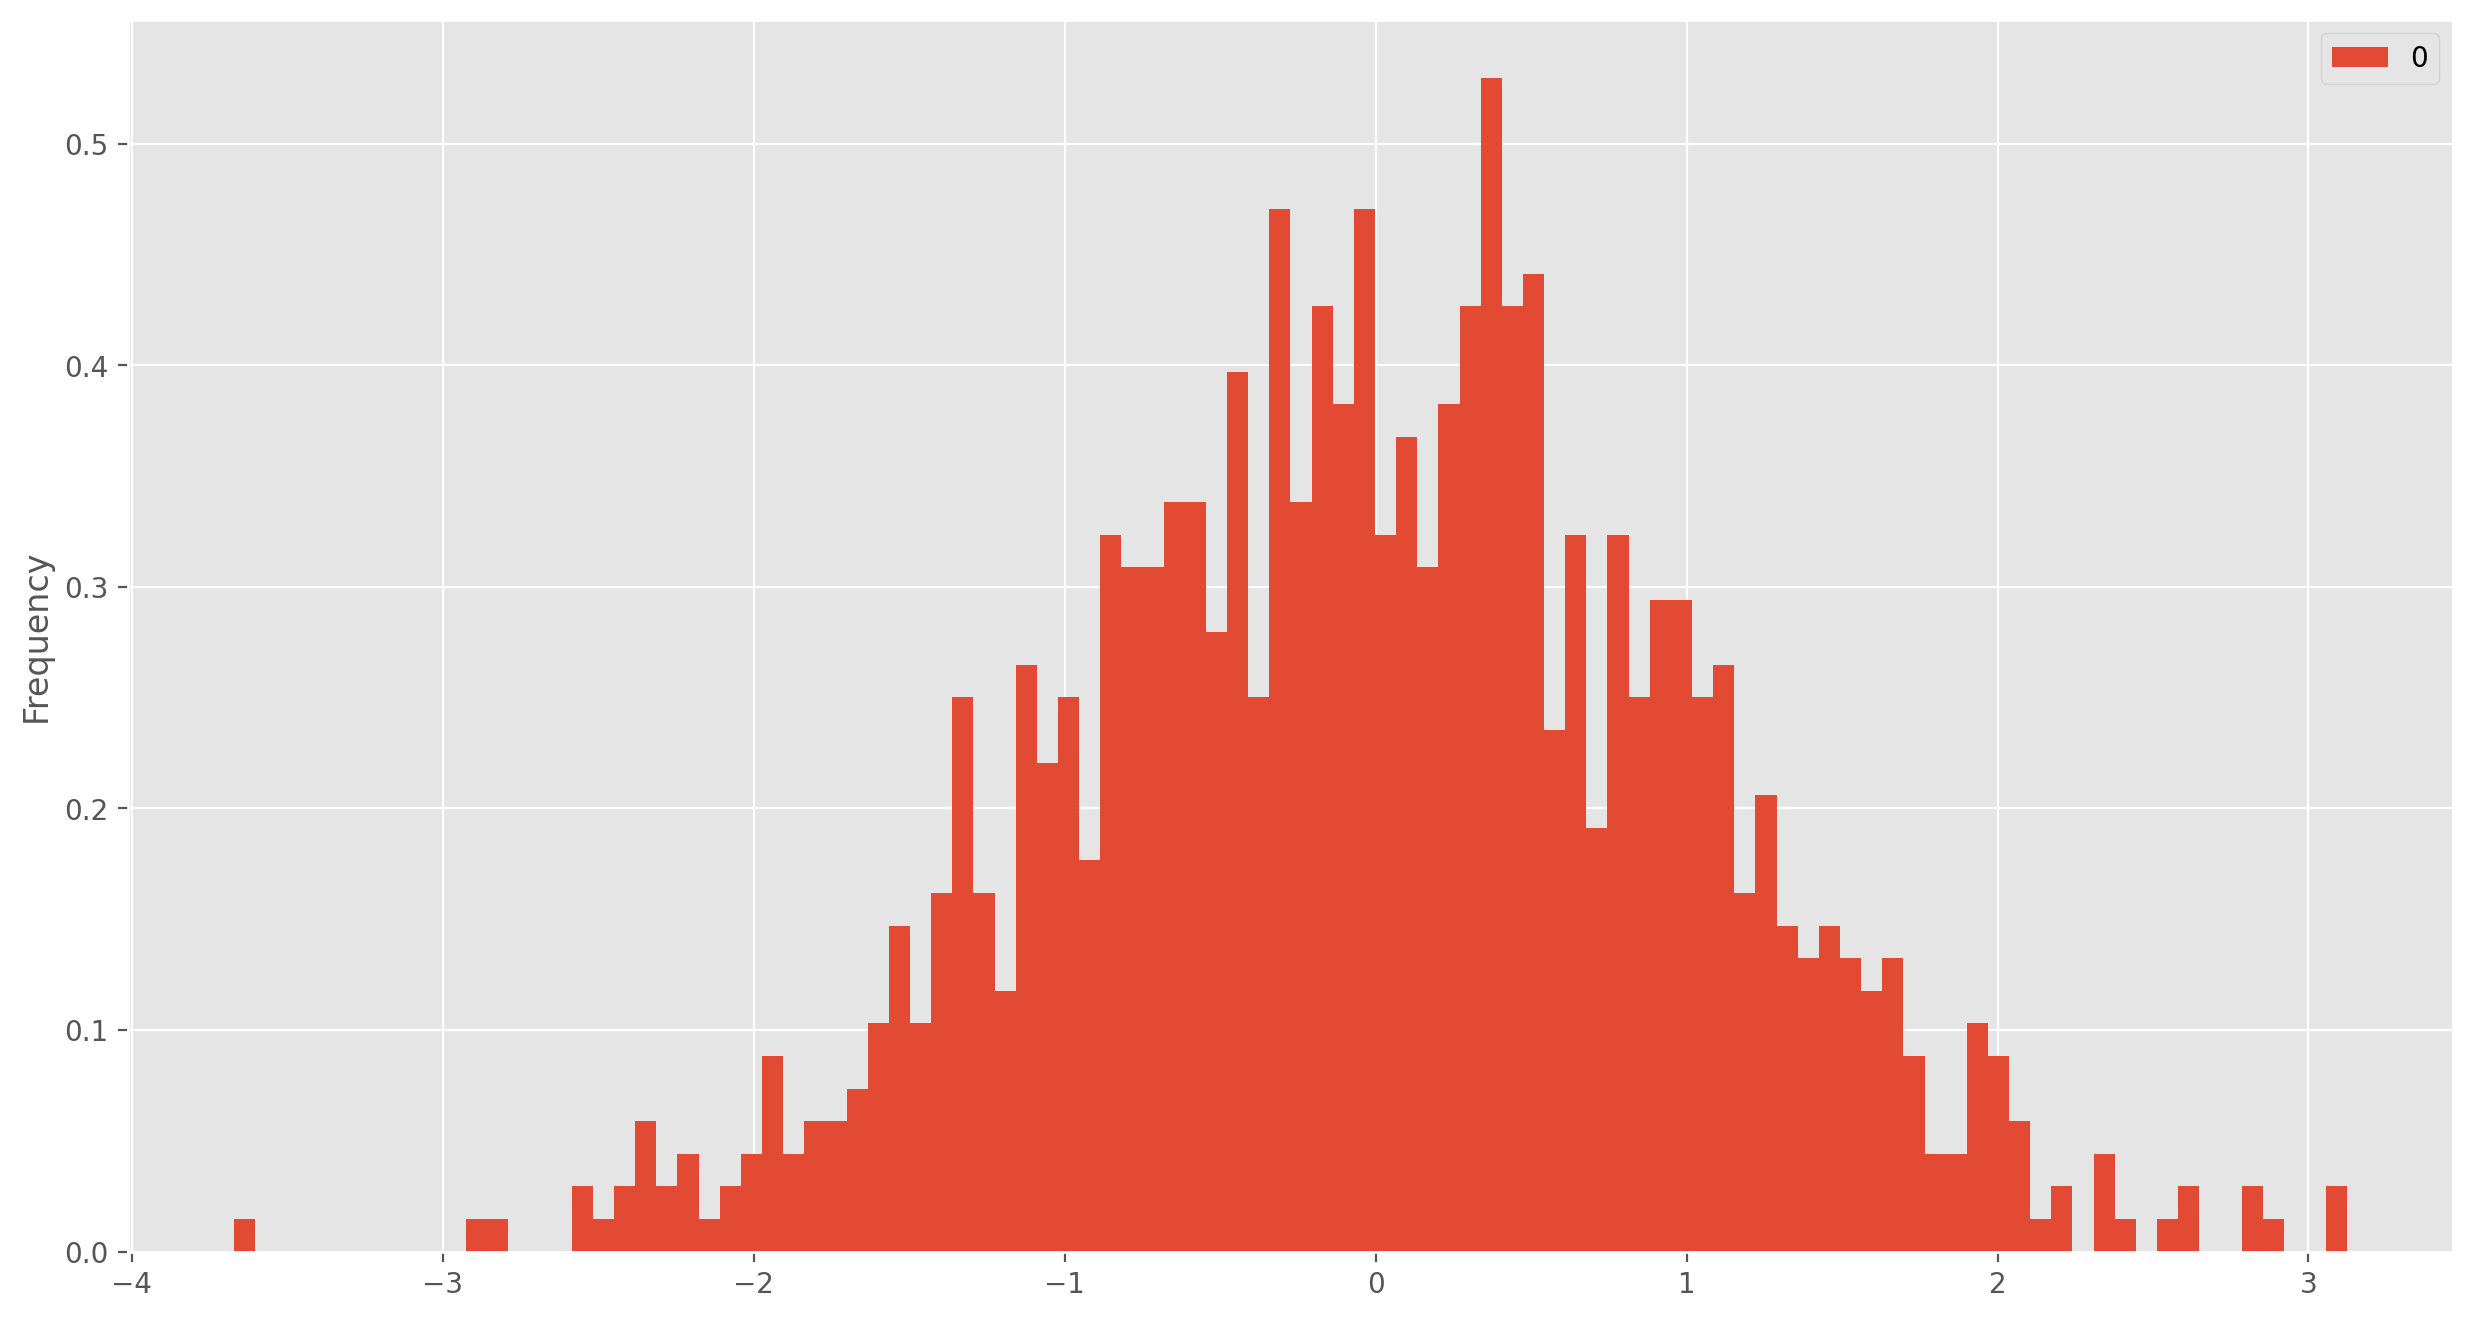

In [35]:
X = st.norm(loc=0, scale=1)

# Generamos datos aleatoriamente de dicha distribución.
data = pd.DataFrame(X.rvs(1000))

fig, ax = plt.subplots(1,1, figsize=(15,8))
data.plot(kind='hist', bins=100, density = True, ax = ax);

### Distribución normal

Tiene como __función de densidad__ (¡no confundir con función masa de probabilidad!):

$$f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Esta función permite calcular la probabilidad de intervalos en los que está definida la variable aleatoria. Por ejemplo, la variable $X$ podría medir los ingresos en miles de euros de varios departamentos cada día del mes, entonces

$$X \sim \mathcal{N} (5,2)$$

y por tanto su función de densidad sería

$$f(x|5,2) = \frac{1}{\sqrt{8\pi}} \cdot e^{-\frac{(x-5)^2}{8}}$$

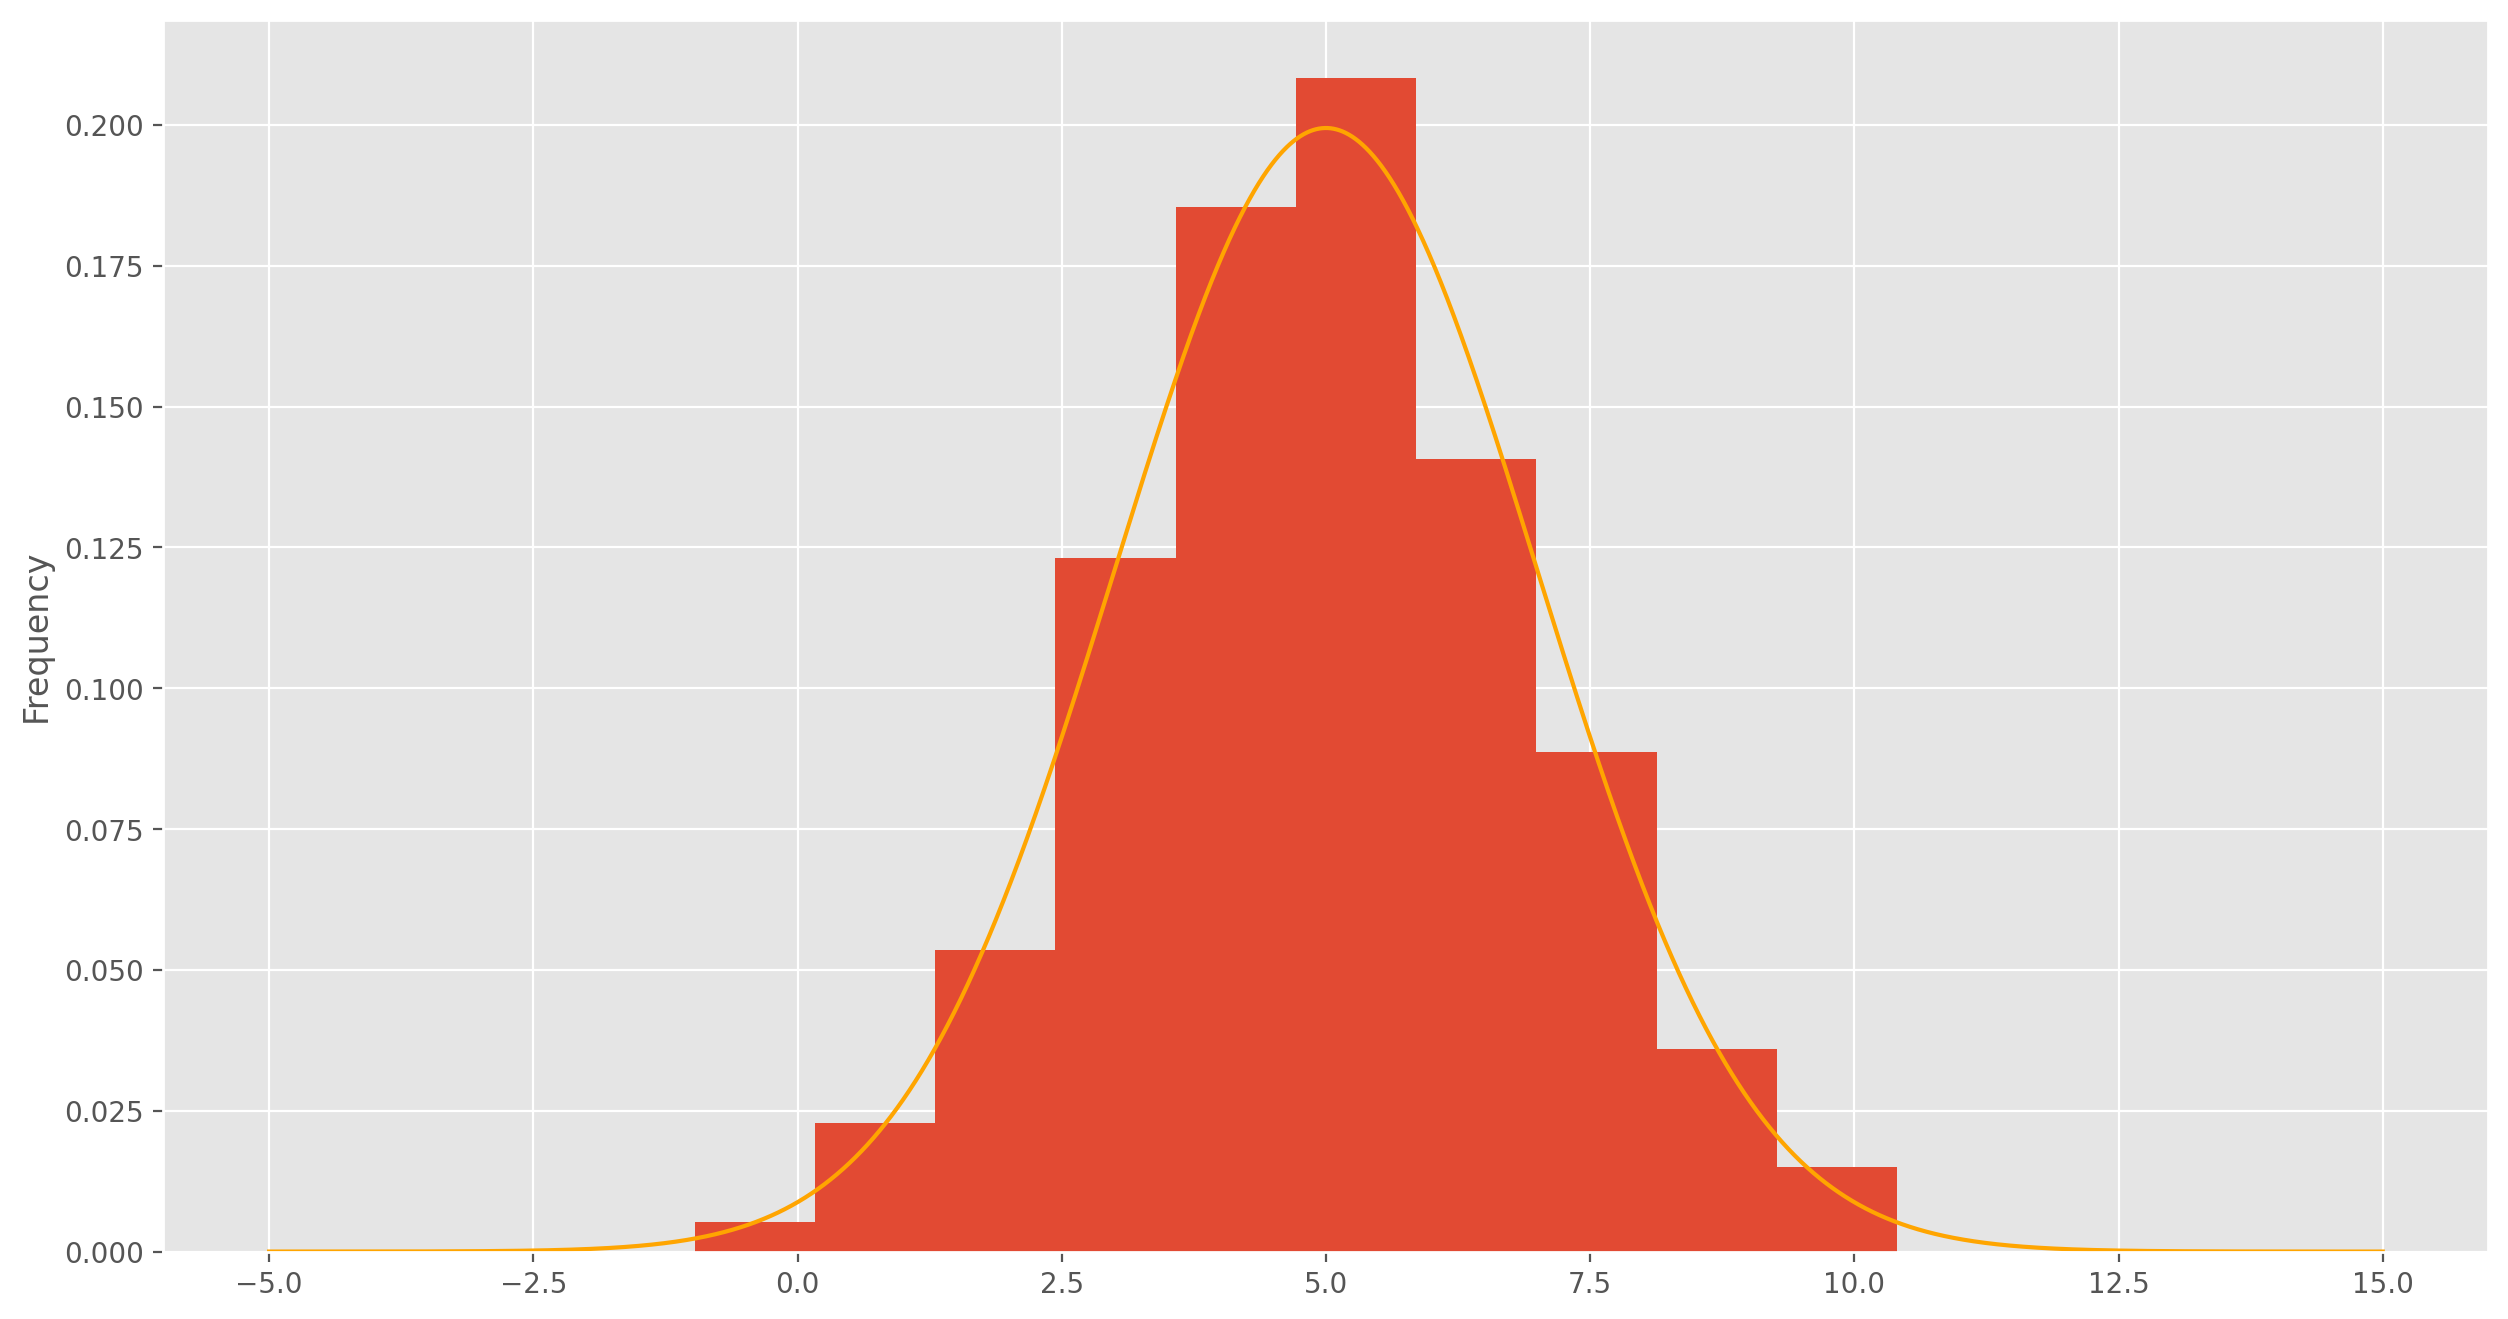

In [10]:
X = st.norm(loc=5, scale=2)

# Generamos 1000 datos aleatoriamente de dicha distribución.
data = pd.DataFrame(X.rvs(1000))

# Calculamos valores x e y para pintar la función de densidad.
x = np.linspace(-5,15,5000)
y = X.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(15,8))
data.plot(kind='hist', density = True, ax = ax)
ax.plot(x,y,color='orange');
ax.legend_.remove()

Descripción del conjunto de datos: número de individuos, media, desviación estándar, máximo, mínimo y percentiles:

In [11]:
data.describe()

,0
count,1000.000000
mean,5.005829
std,1.983636
min,-0.972455
25%,3.667524
50%,4.995702
75%,6.366750
max,10.404911


Descripción de la variable aleatoria: media, desvición típica

In [12]:
mean, var = X.stats(moments='mv')
print('media (mean) = ', mean, 'desv. típica (std) = ', np.sqrt(var))

media (mean) =  5.0 desv. típica (std) =  2.0


In [13]:
P25, P50, P75 = X.ppf([0.25, 0.5, 0.75])
print('P25 (25%) =', P25, 'P50 (50%) =', P50, 'P75 (75%) =', P75)

P25 (25%) = 3.651020499607837 P50 (50%) = 5.0 P75 (75%) = 6.348979500392163


## Distintos parámetros en la distribución normal

Calculamos funciones de densidad para distintos valores de la media y desviación típica:

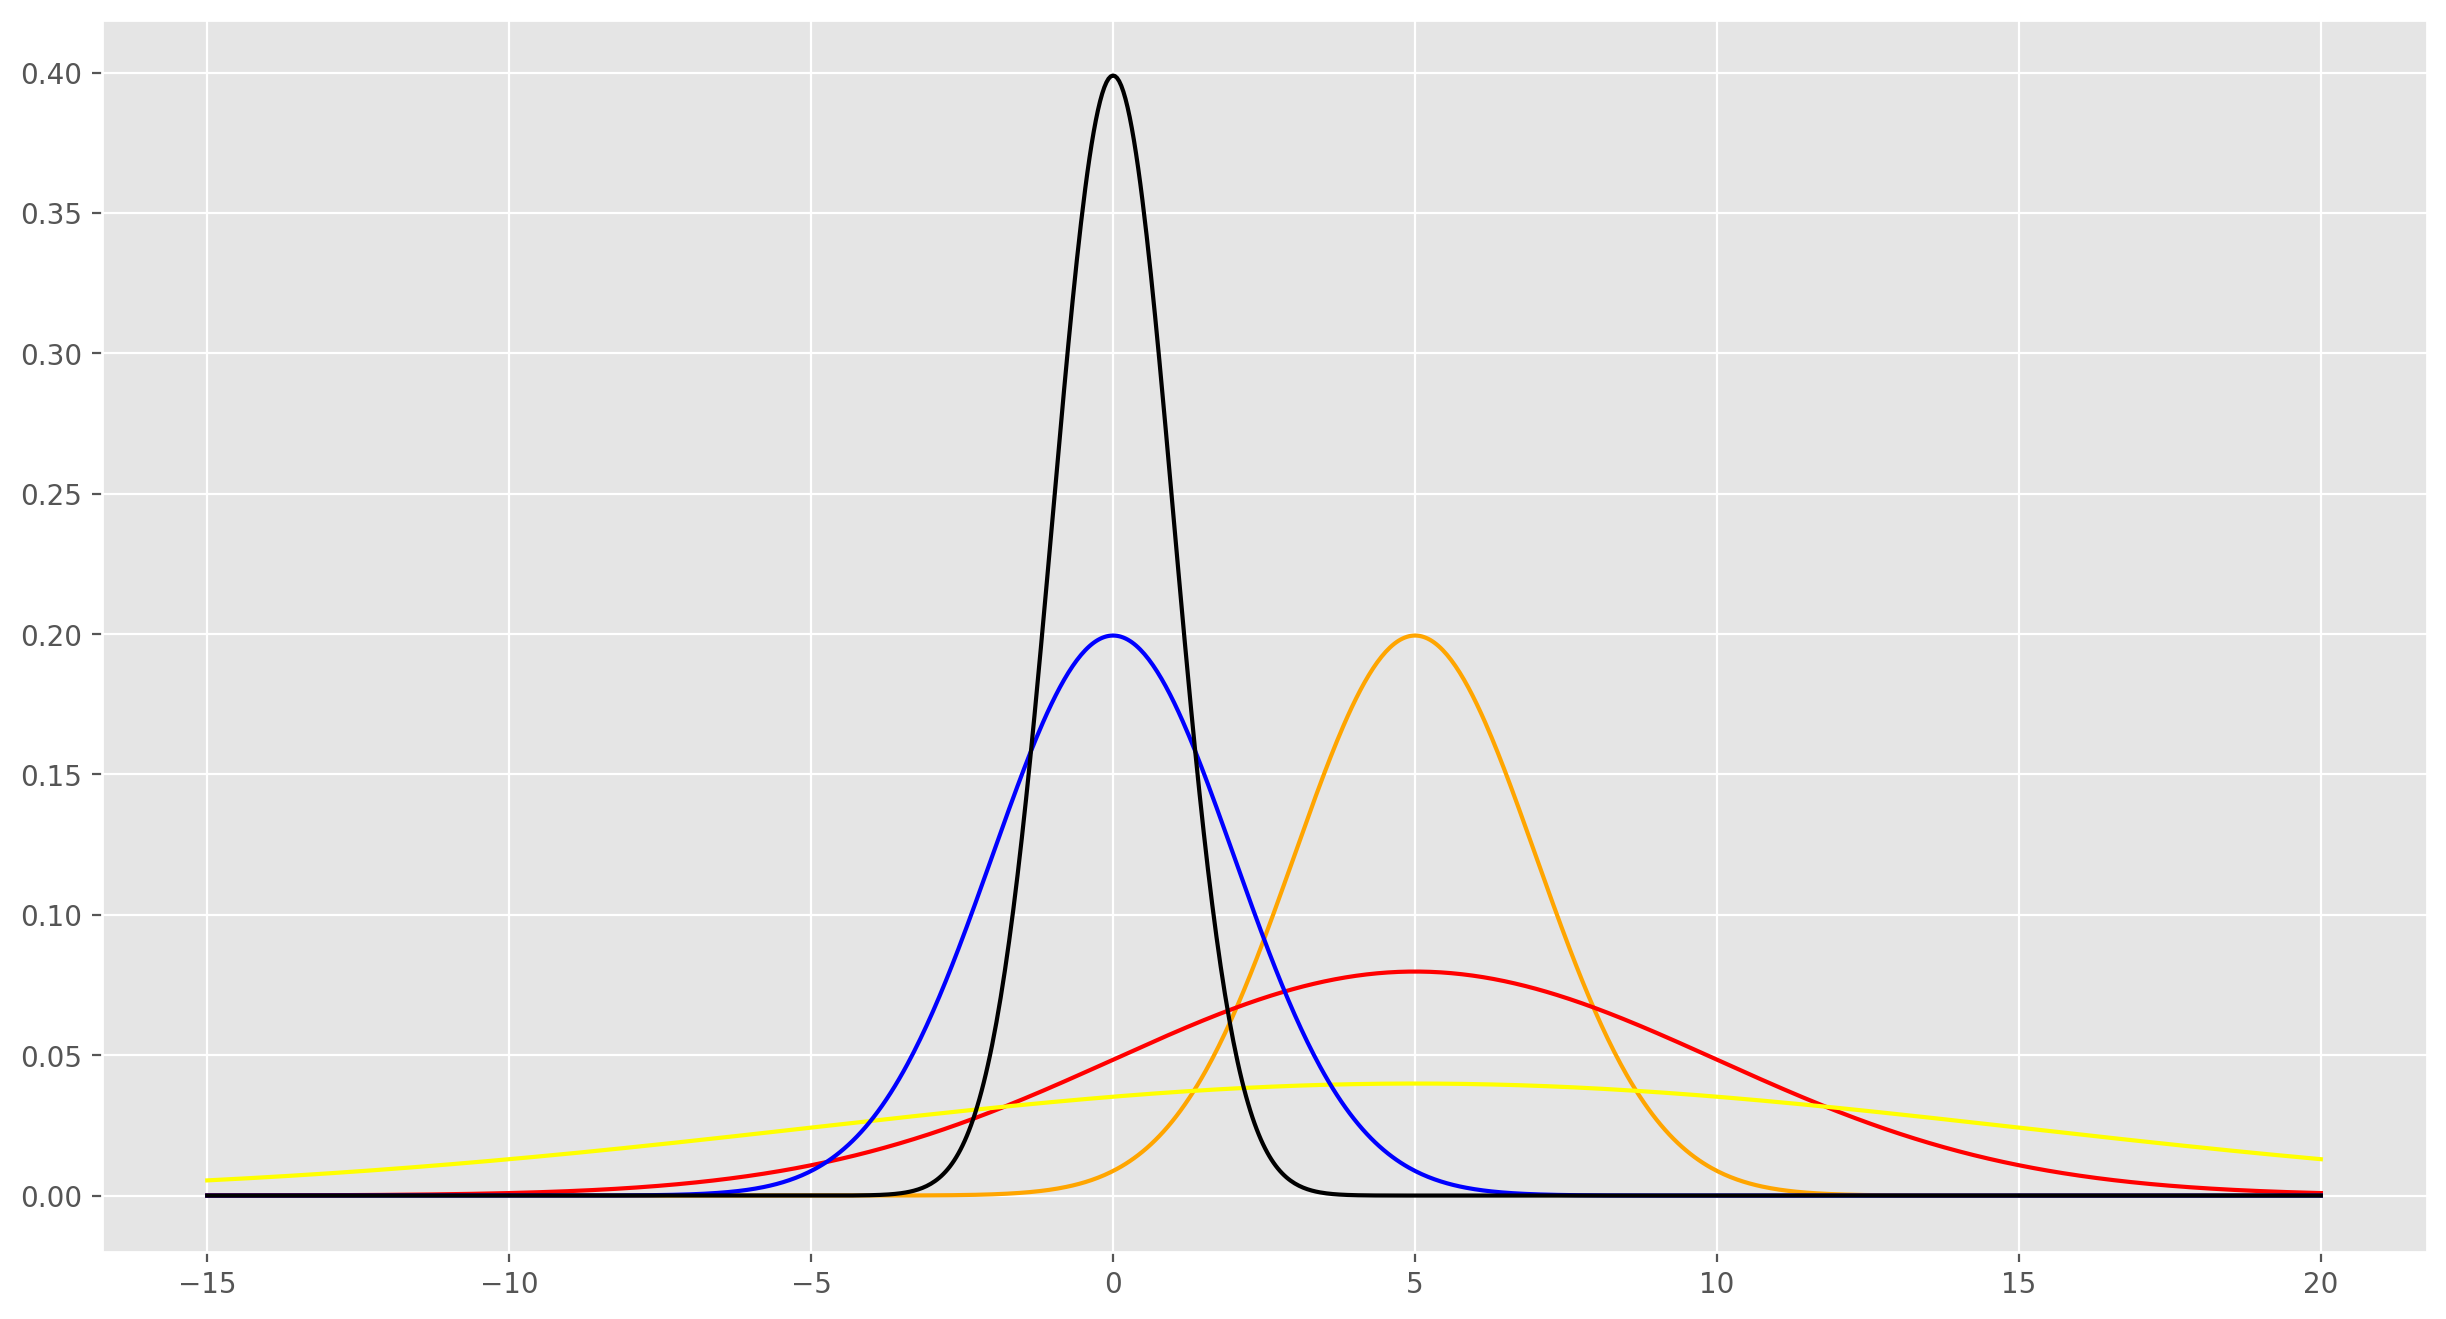

In [14]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

x = np.linspace(-15,20,1000)
y1 = st.norm(loc=5, scale=2).pdf(x)
ax.plot(x,y1,color='orange');
y2 = st.norm(loc=5, scale=5).pdf(x)
ax.plot(x,y2,color='red');
y3 = st.norm(loc=5, scale=10).pdf(x)
ax.plot(x,y3,color='yellow');

y4 = st.norm(loc=0, scale=2).pdf(x)
ax.plot(x,y4,color='blue');
y5 = st.norm(loc=0, scale=1).pdf(x)
ax.plot(x,y5,color='black');

### Distribución Chi-cuadrado: $\chi^2(m)$

Se define como la suma de distribuciones normales estandarizadas independientes al cuadrado, es decir,

$$Y = \sum_{i=1}^m Z_i^2, \quad \mbox{siendo} \quad Z_i \sim \mathcal{N}(0,1)$$

El único parámetro en esta distribución es saber cuántas normales estandarizadas tenemos que sumar $(m)$, también llamado __grados de libertad__ (degrees of freedom (df) en sus siglas en inglés). La función de densidad es 

$$ f(x| m) = \frac{1}{2\cdot \Gamma(m/2)} \cdot \left(\frac{x}{2}\right)^{m/2-1} \cdot e^{-x/2} $$

### Ejemplo.
Calculamos la función de densidad de una distribución chi-cuadrado con 5 grados de libertad:

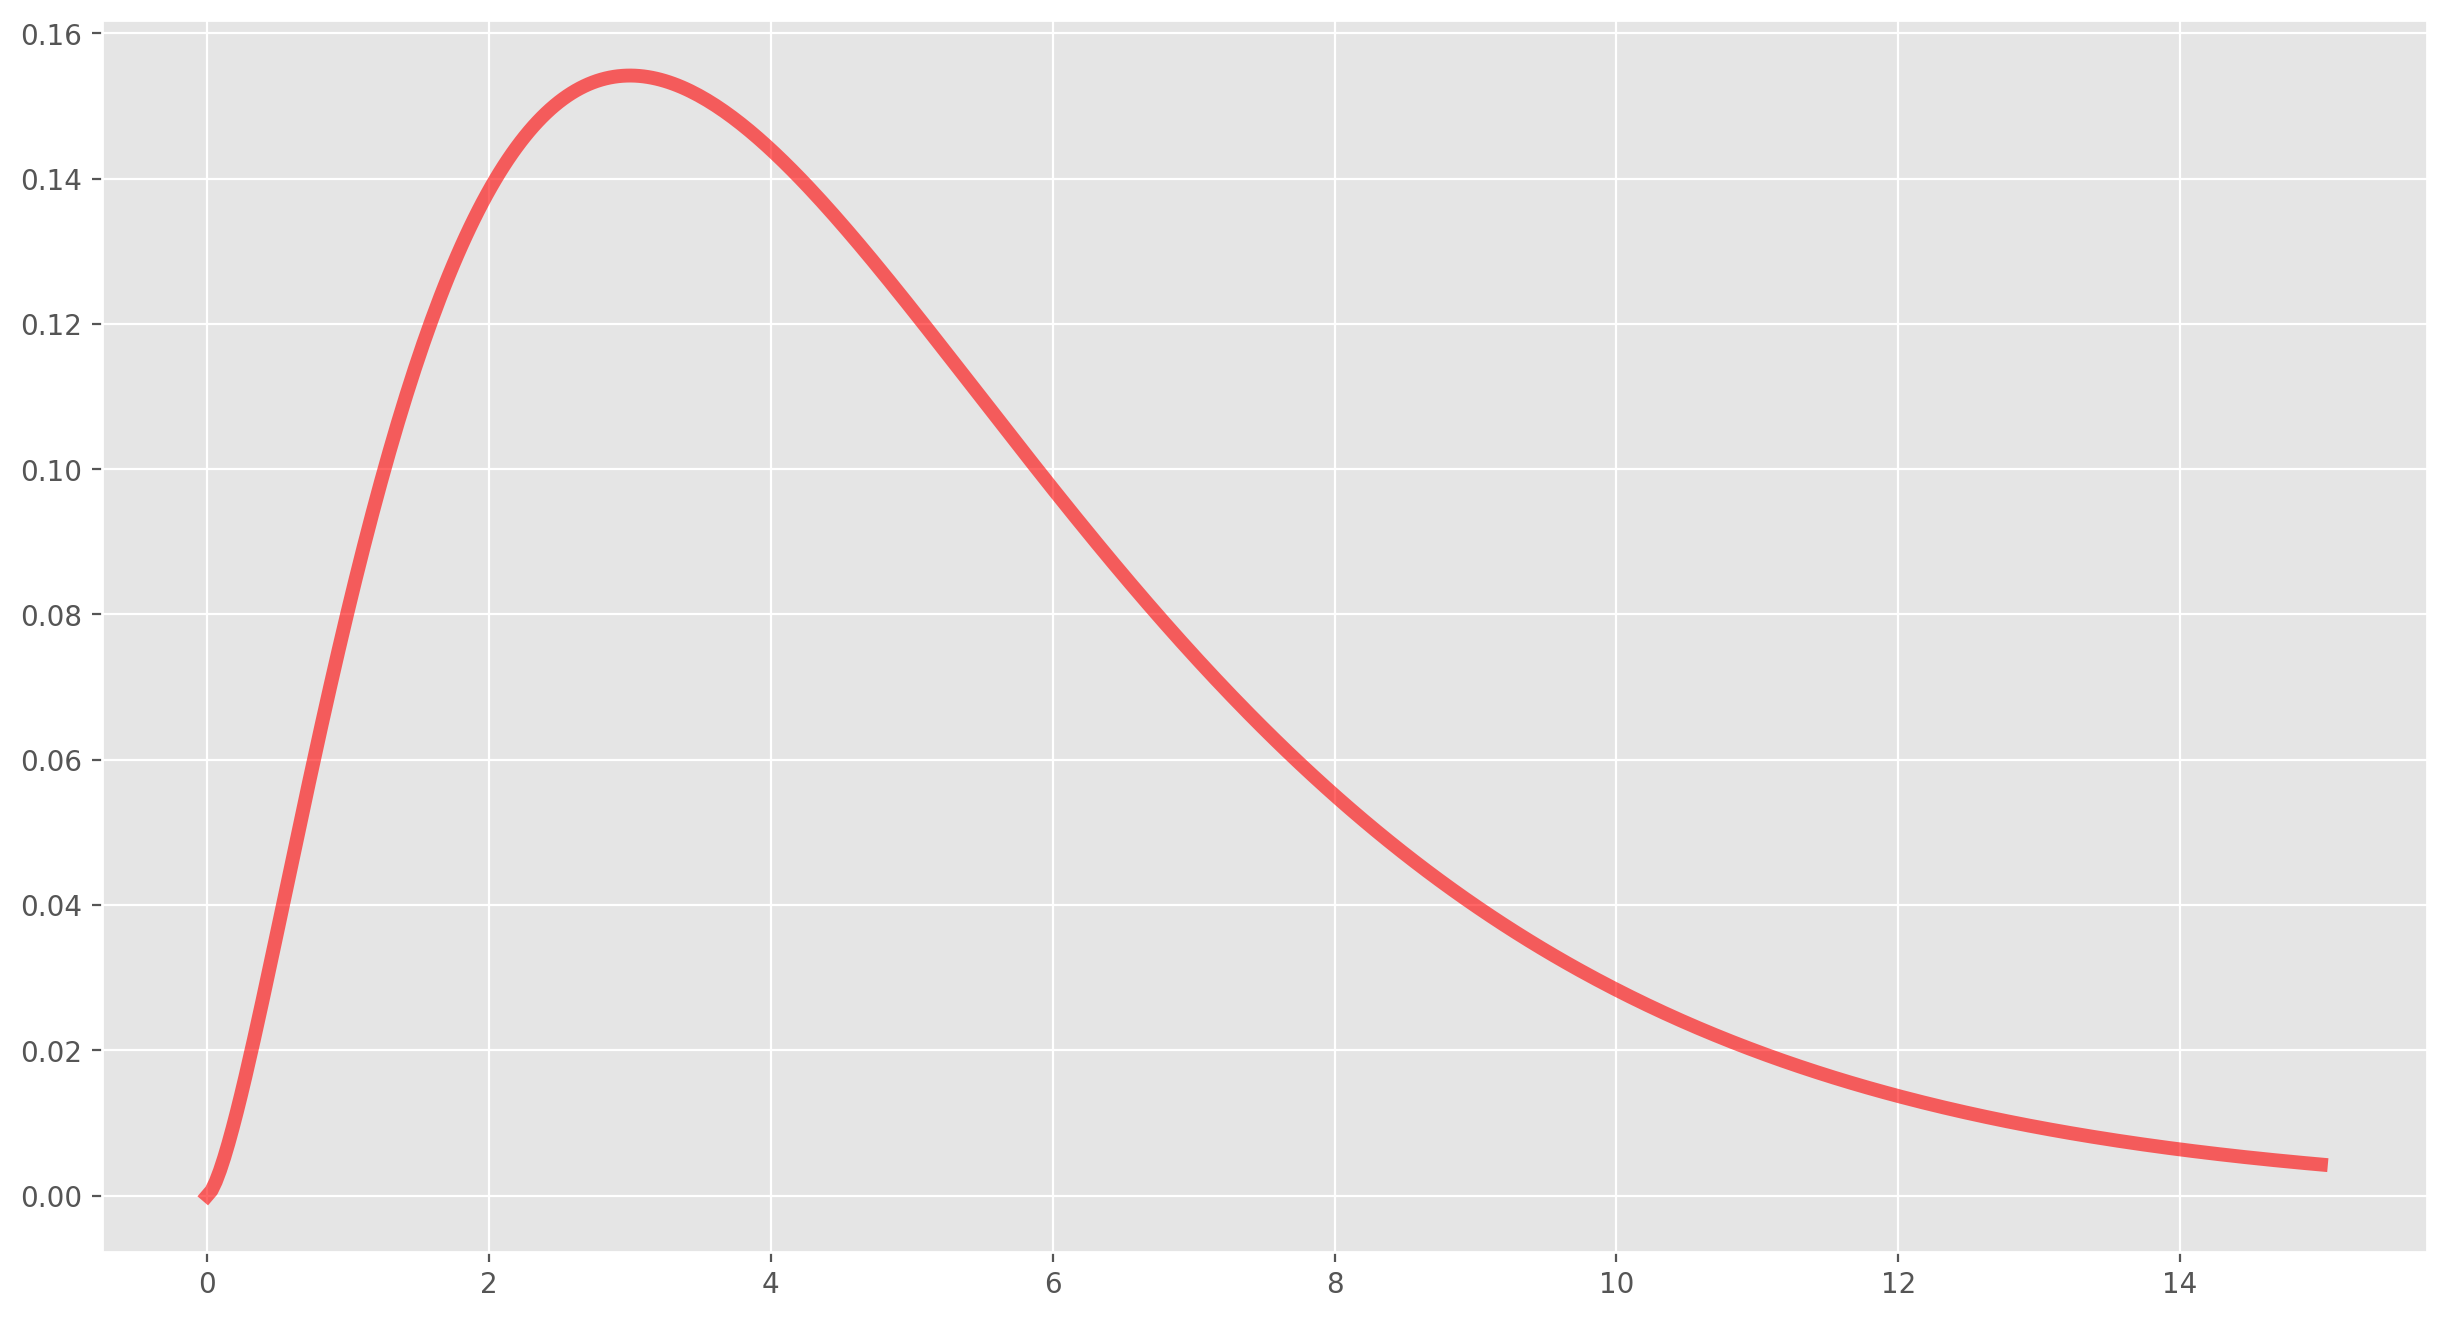

In [15]:
X = st.chi2(df = 5.)

x = np.linspace(0, 15, 500)
y = X.pdf(x)

fig,ax = plt.subplots(1, 1, figsize=(15,8))
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='chi2 pdf');

### Ejercicio

Calcula la media, varianza, asimetría y curtosis de una variable aleatoria que sigue la distribución $\chi^2(10)$.

### Distrubución t-Student

Consideremos dos variables aleatorias $X \sim  \mathcal{N}(0,1)$ e $Y \sim \chi^2(m)$, entonces la variable

$$ T = \frac{X}{\sqrt{\frac{Y}{m}}} $$

se distribuye como una distribución t-Student con $m$ grados de libertad, $t(m)$, con función de densidad

$$f(x|m) = \frac{\Gamma((m+1)/2)}{\sqrt{\pi \cdot m} \cdot \Gamma(df/2) \cdot (1+x^2/m)^{(m+1)/2}} $$

### Ejemplo

La siguiente variable aleatoria sigue una distribución t-Student con 3 grados de libertad:

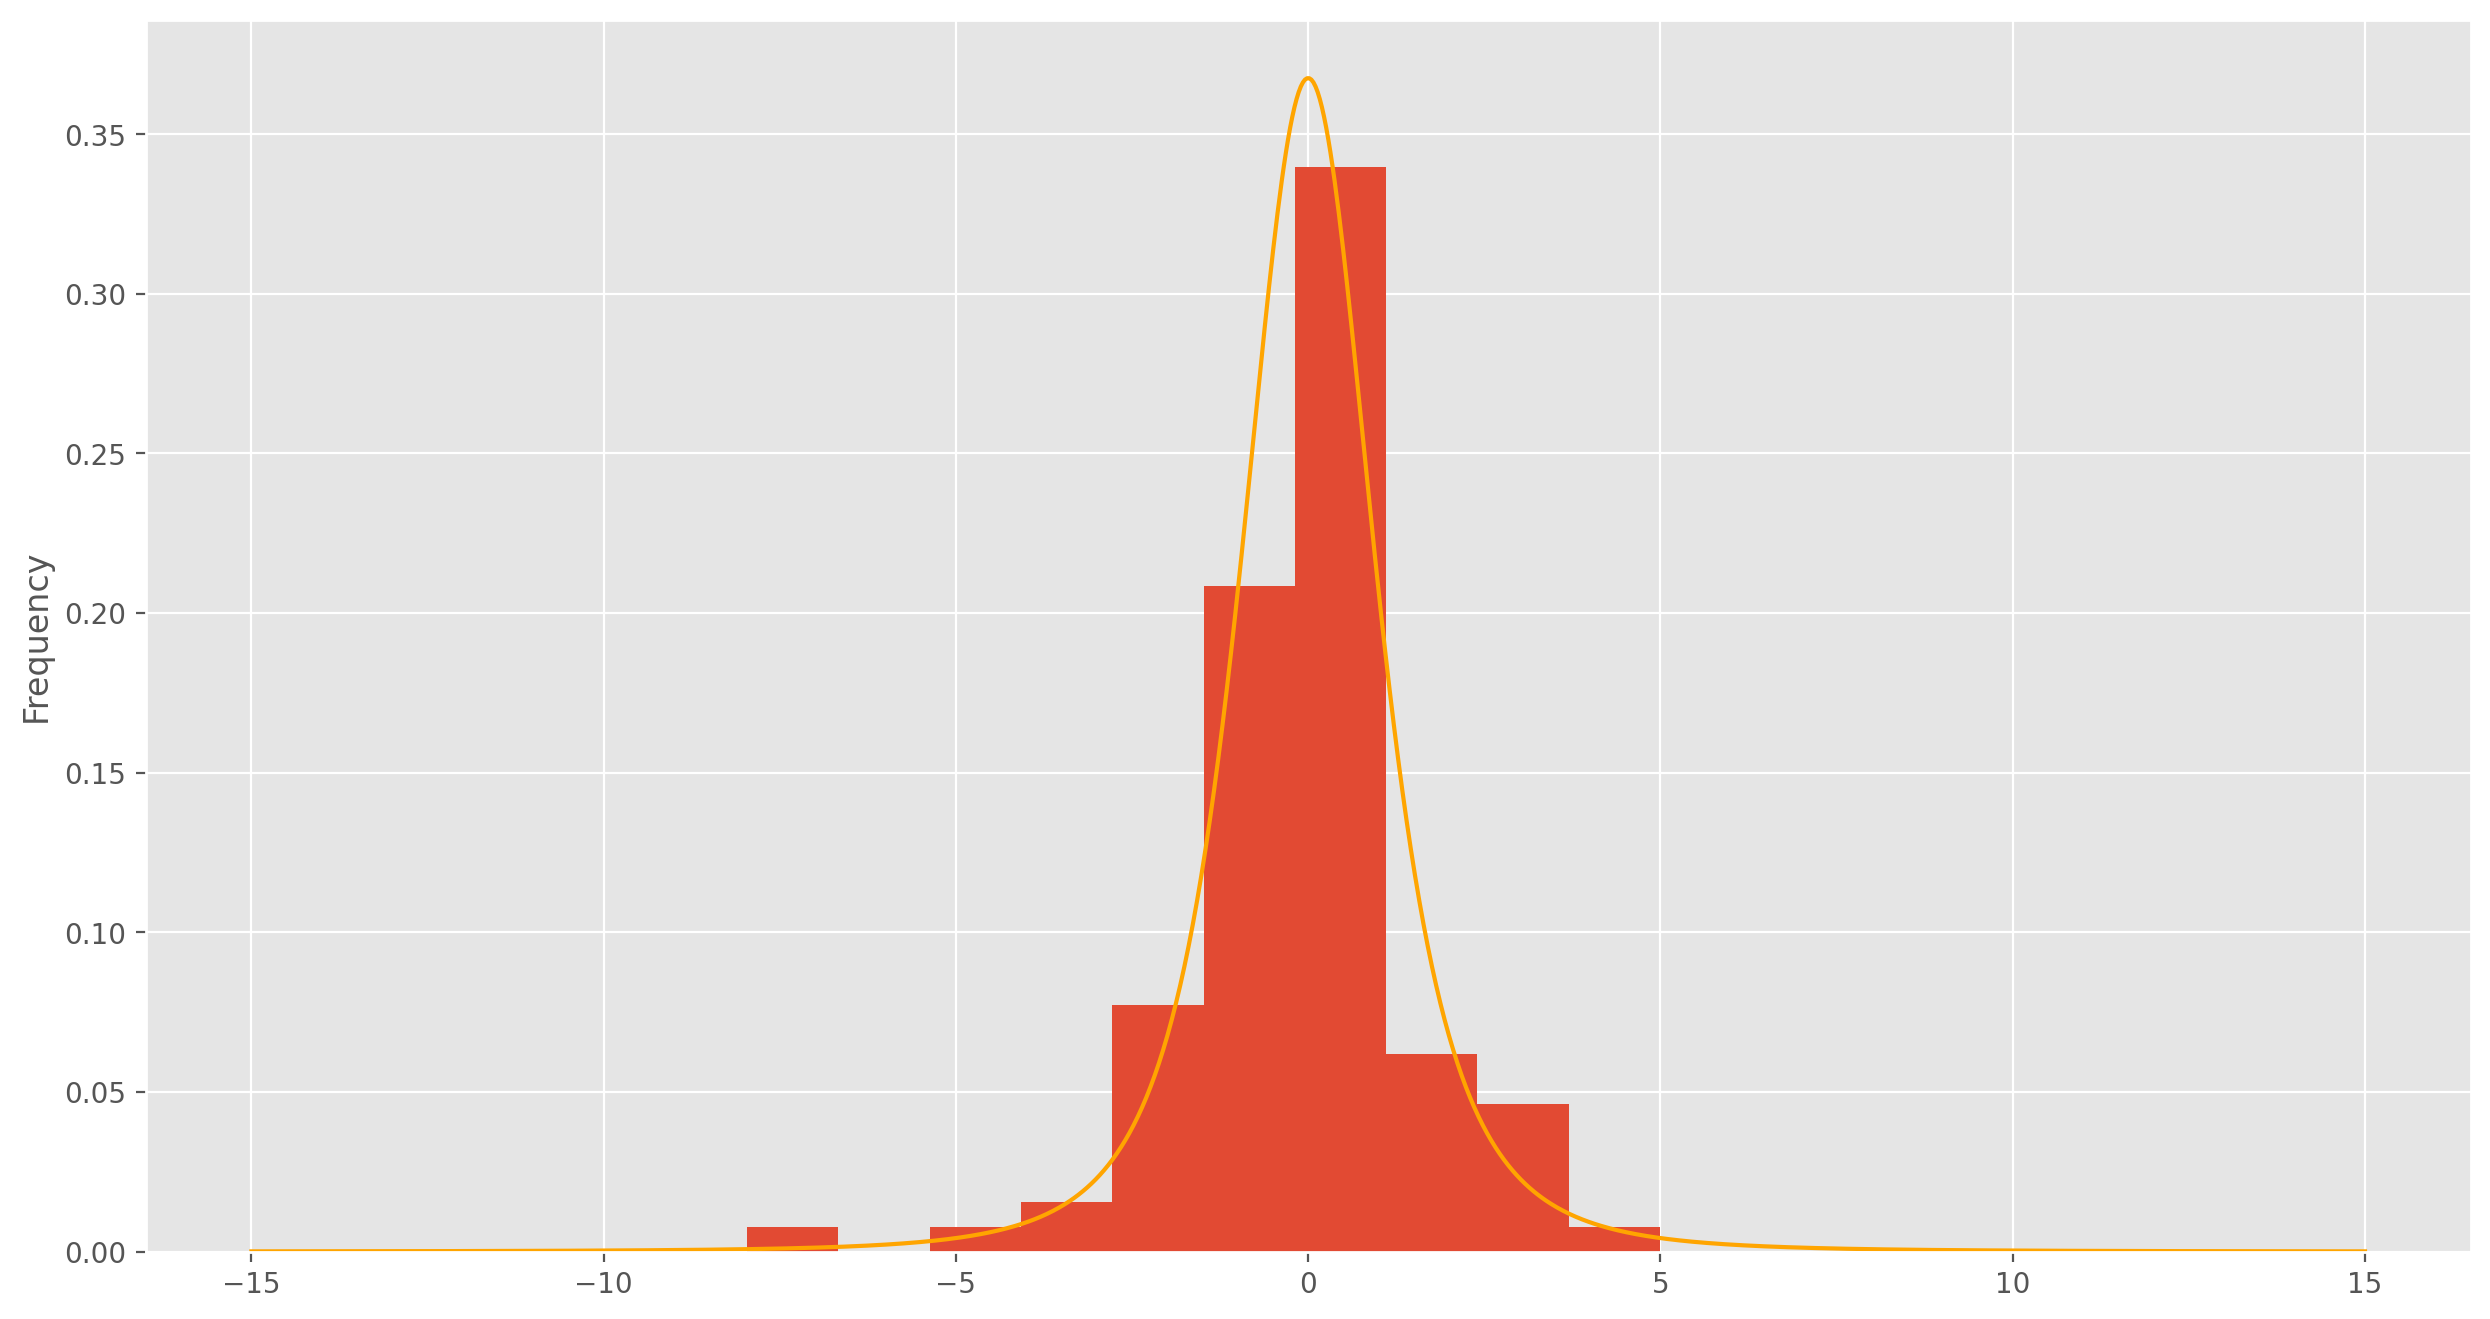

In [16]:
X = st.t(3)

# Generamos 100 datos aleatoriamente de dicha distribución.
data = pd.DataFrame(X.rvs(100))

# calculamos la x e y para pintar la función de densidad.
x = np.linspace(-15,15,1000)
y = X.pdf(x)

fig, ax = plt.subplots(1,1, figsize=(15,8))

data.plot(kind='hist', density = True, ax = ax)
ax.plot(x,y,color='orange')
ax.legend_.remove();

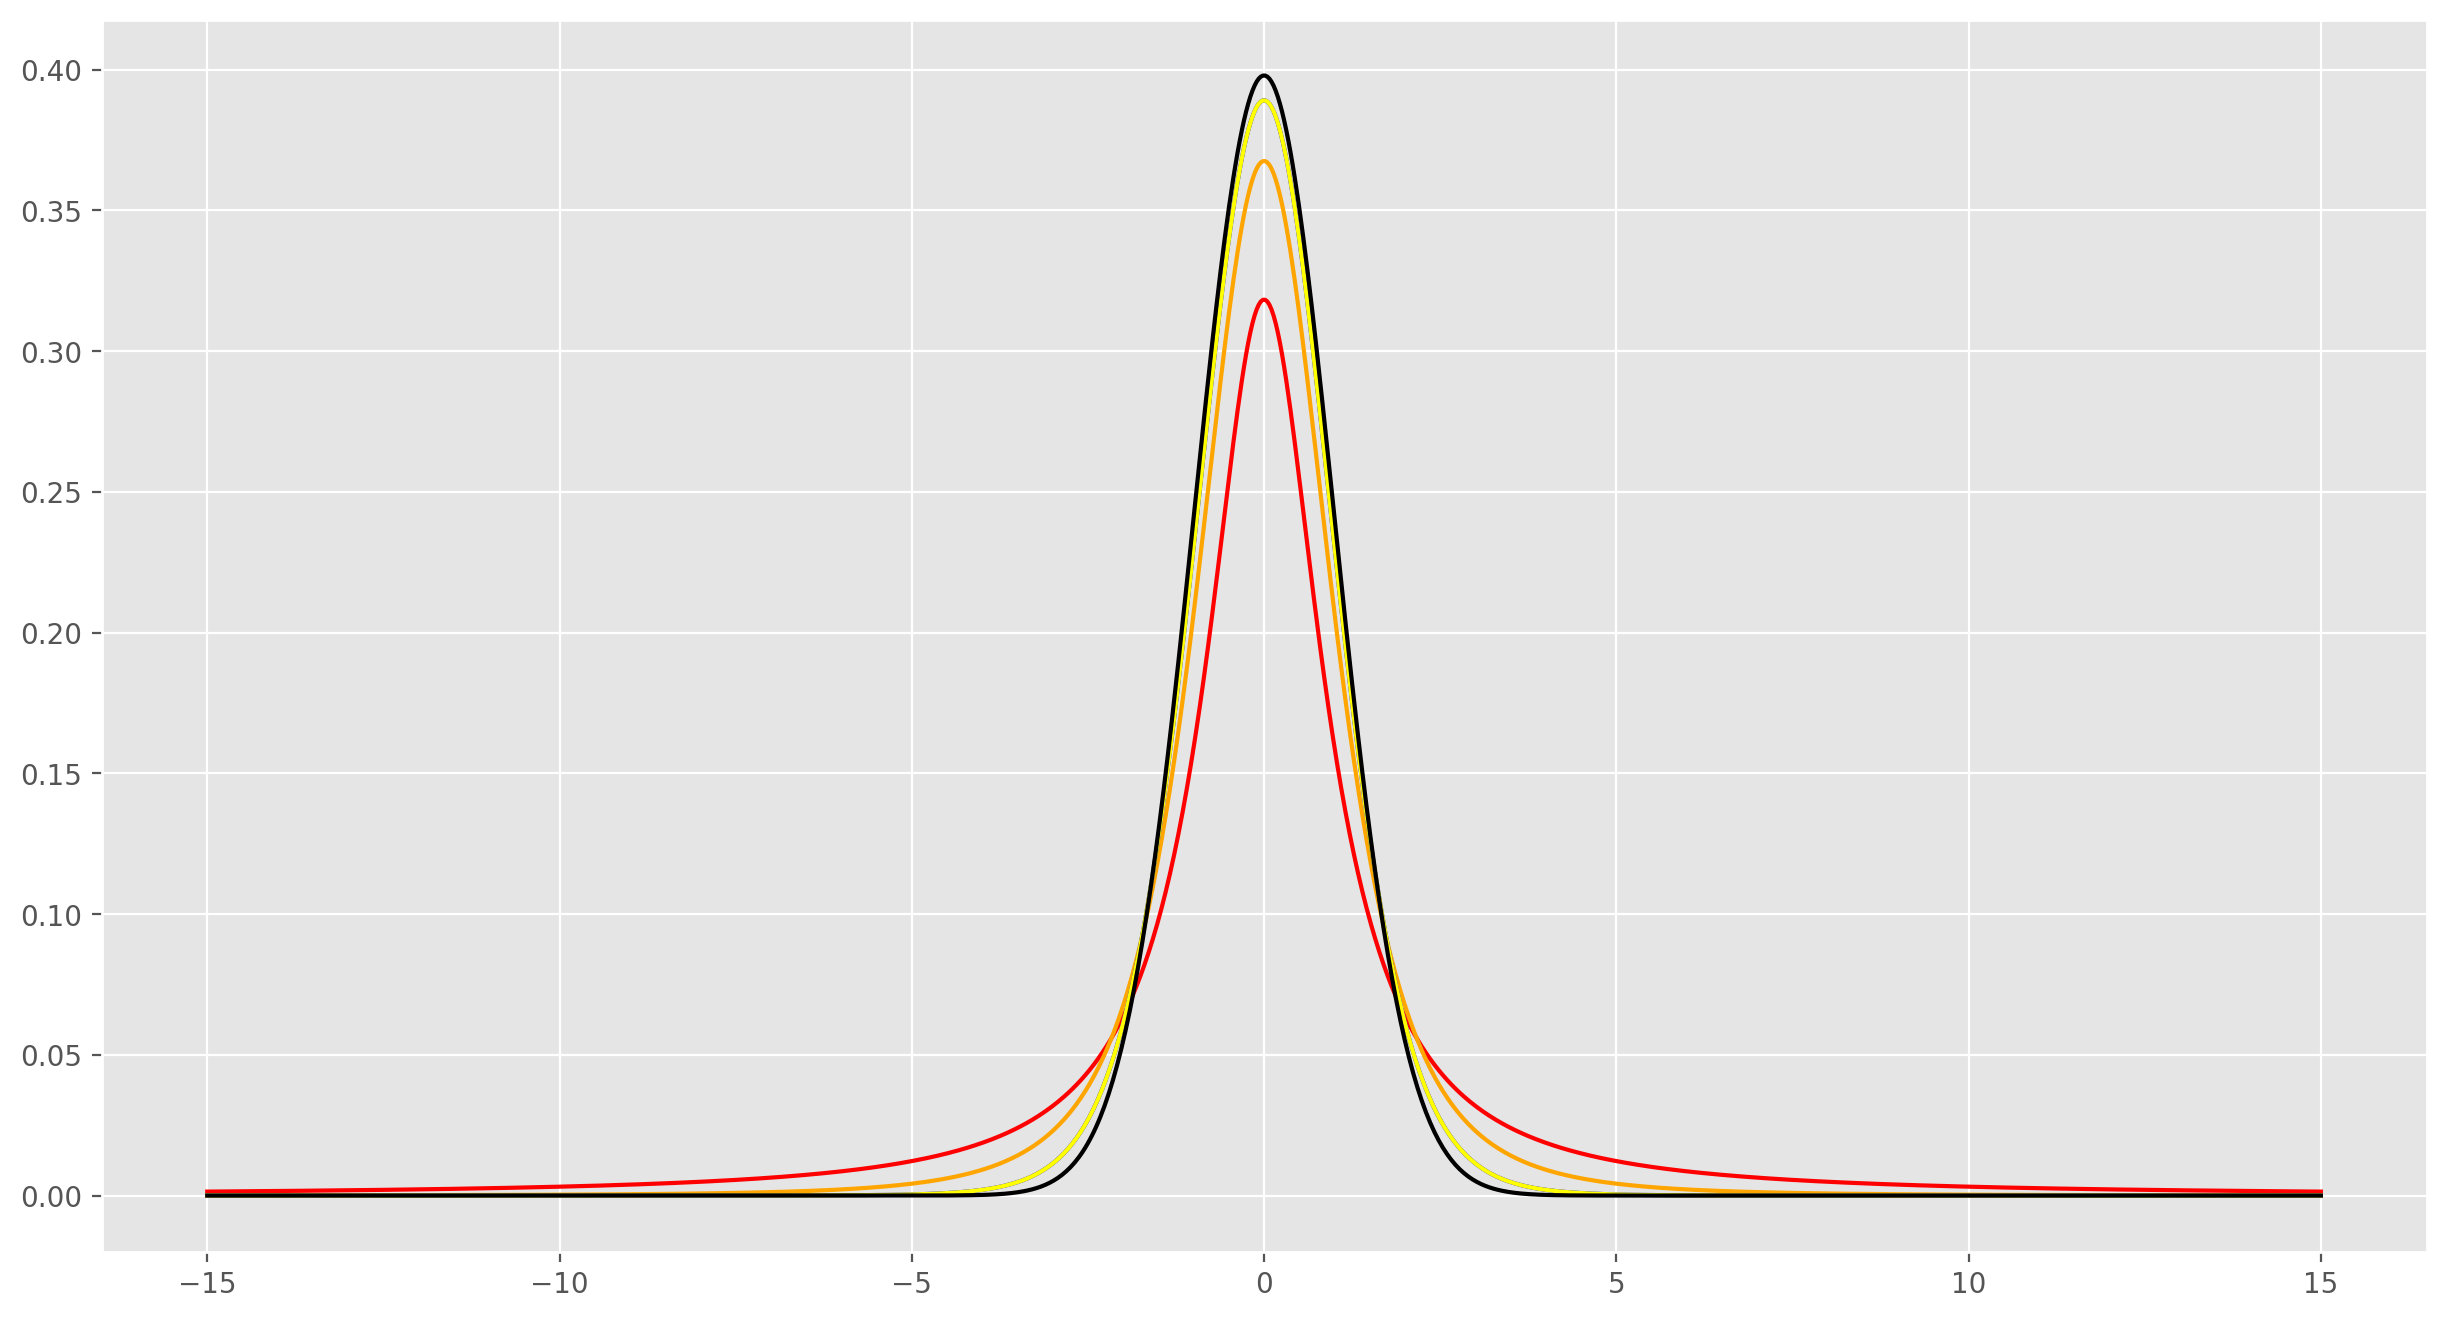

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

x = np.linspace(-15,15,1000)

y0 = st.t(1).pdf(x)
ax.plot(x,y0,color='red');

y1 = st.t(3).pdf(x)
ax.plot(x,y1,color='orange');

y2 = st.t(10).pdf(x)
ax.plot(x,y2,color='blue');

y3 = st.t(20).pdf(x)
ax.plot(x,y2,color='yellow');

y4 = st.t(100).pdf(x)
ax.plot(x,y4,color='black');


También existe la versión desplazada de la t-Student:

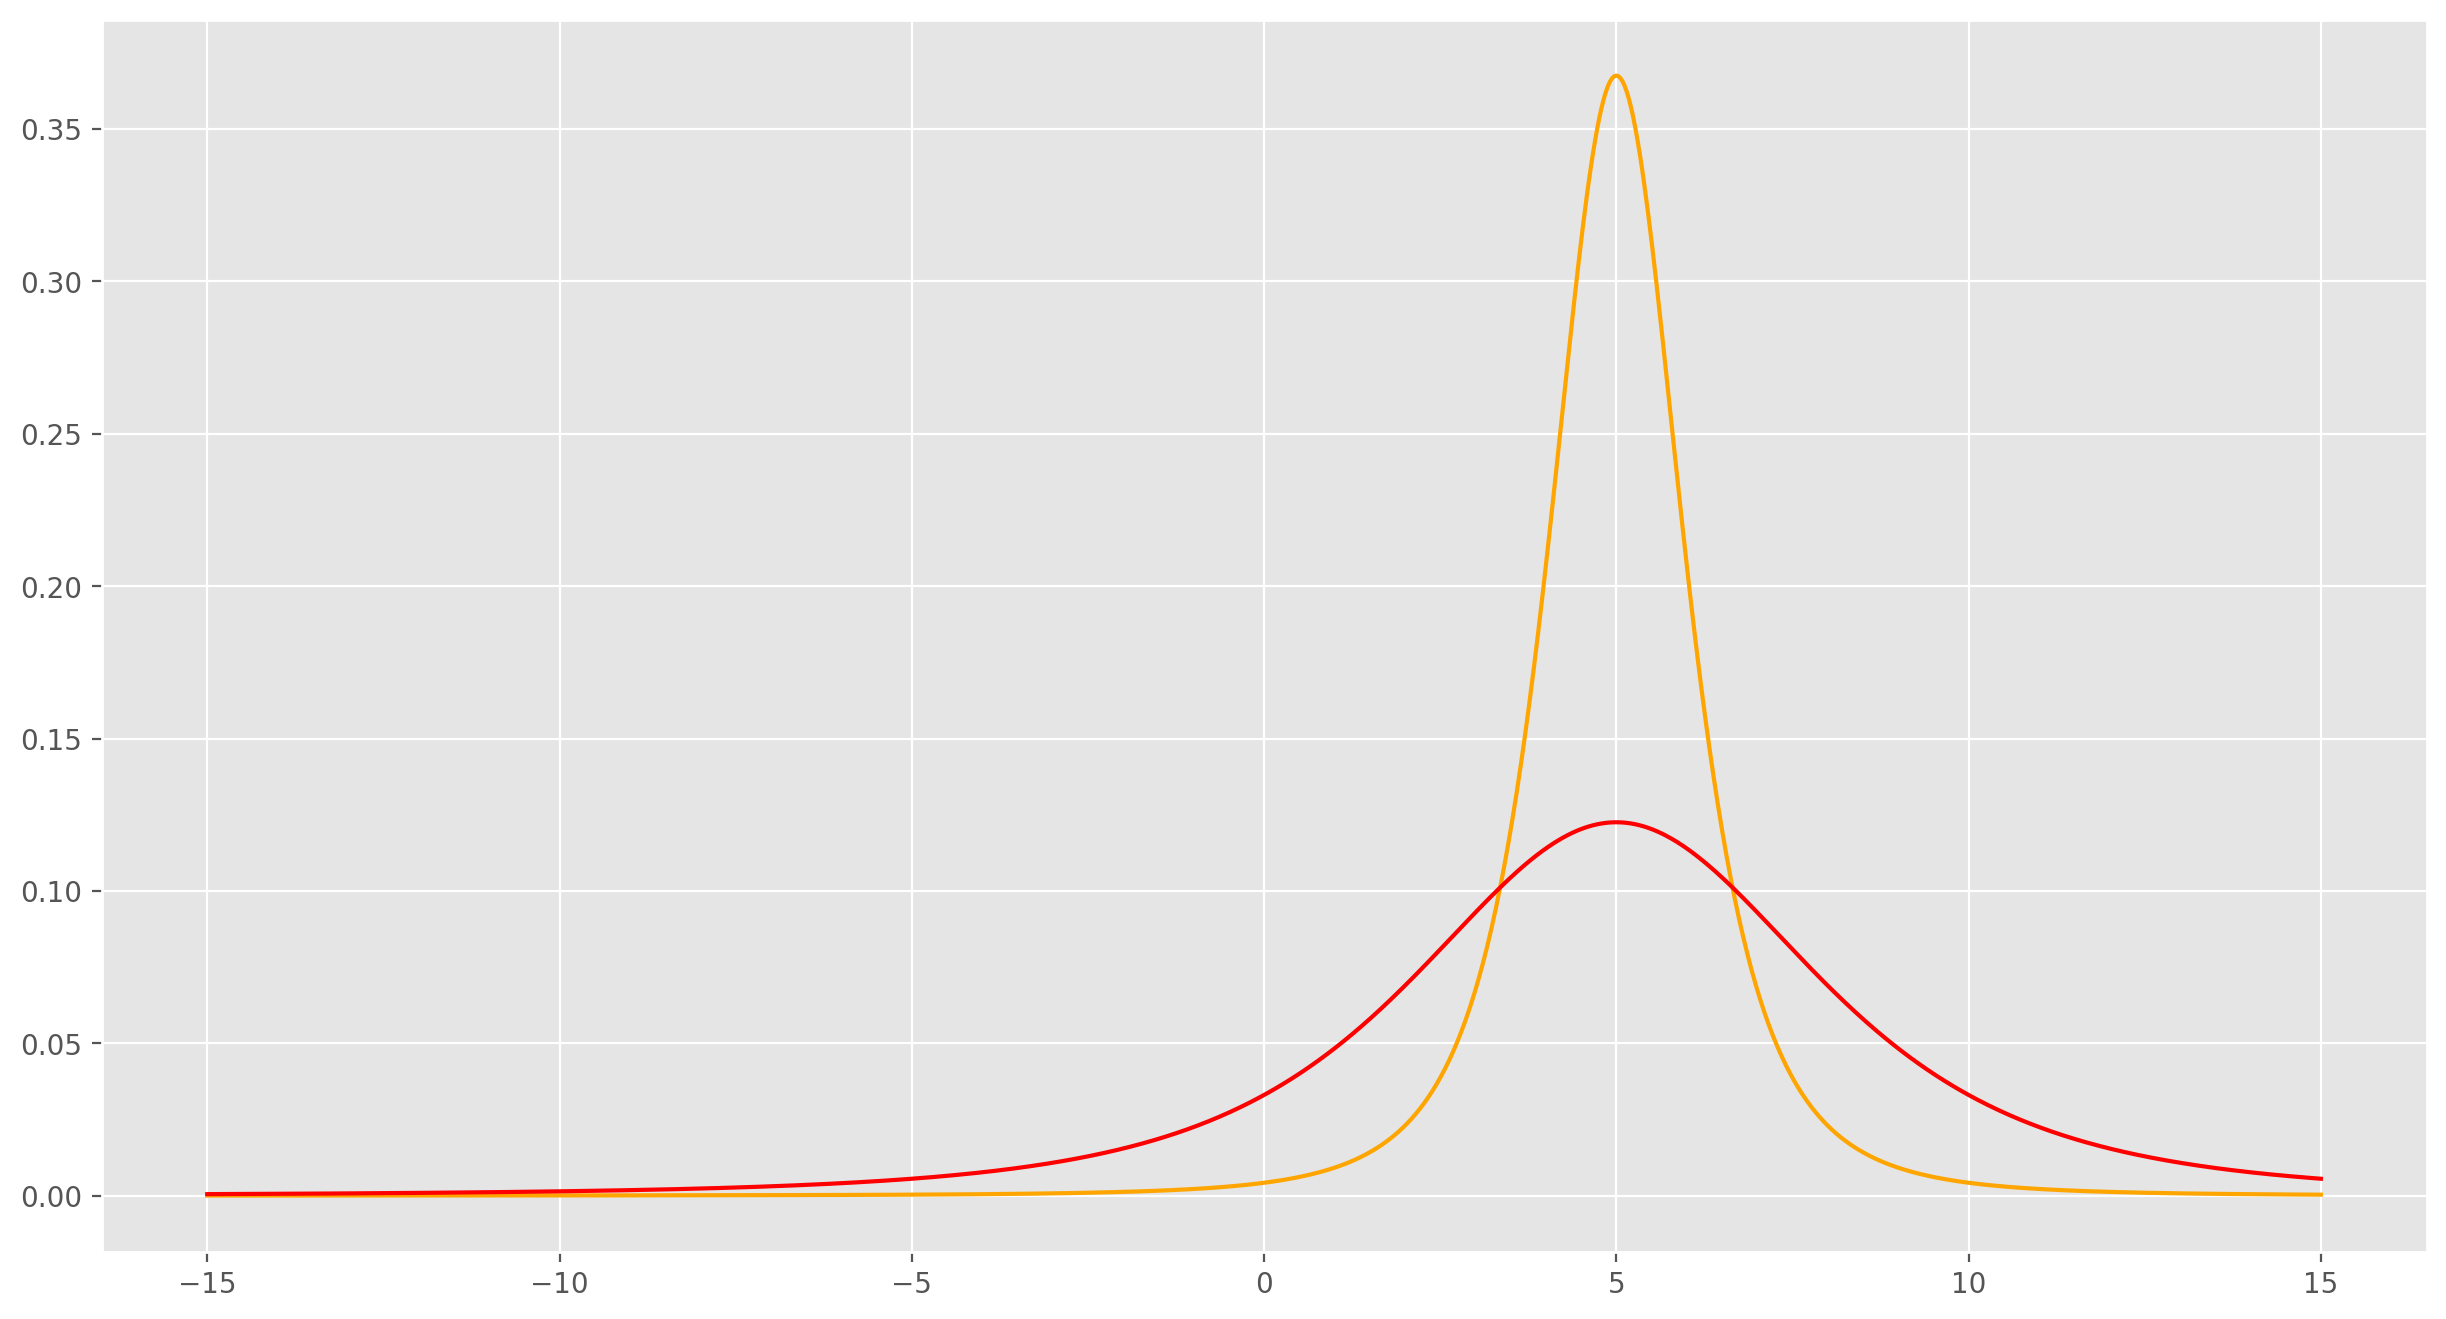

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

X1 = st.t(3,loc=5)
X2 = st.t(3,loc=5, scale=3)

x = np.linspace(-15,15,1000)
y1 = X1.pdf(x)
y2 =X2.pdf(x)

ax.plot(x,y1,color='orange');
ax.plot(x,y2,color='red');